<a href="https://colab.research.google.com/github/sadikinisaac/countingwords/blob/master/EDA_mayor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import libraries

import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
sns.set_style('dark')
sns.set_context('notebook', font_scale=1.3)
# This line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# This line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

In [4]:
from google.colab import files
uploaded = files.upload()

Saving sat_scores.csv to sat_scores.csv


In [5]:
import io
sat = pd.read_csv(io.BytesIO(uploaded['sat_scores.csv']))

sat.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [0]:
with open('sat_scores.csv', mode='r') as f:
    reader = csv.reader(f)
    rows = [row for row in reader]
    header = rows.pop(0)
    data = {header[i]:[row[i] for row in rows] for i in range(4)}

In [7]:
# Create DataFrame with the SAT dictionary.
sat_dic = pd.DataFrame(data)
sat_dic.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

In [8]:
sat.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [9]:
sat.tail()

,State,Rate,Verbal,Math
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551
51,All,45,506,514


In [0]:
# Analyse focus on individual state.
# Drop the last row with "State" is "All".
sat = sat[:51]

In [11]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
State     51 non-null object
Rate      51 non-null int64
Verbal    51 non-null int64
Math      51 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [0]:
# 2 Create a "data dictionary" based on the data

In [12]:
# Create data dictionary.
d = {
    'Columns': list(sat.columns.values),
    'Type': list(sat.dtypes.values),
    'Description': {
        'State': 'Names of each state',
        'Rate': 'Participation rate by state',
        'Verbal': 'Average verbal score',
        'Math': 'Average math score'
    },
    'Shape': sat.shape
}

# Print data dictionary.
pprint(d)

{'Columns': ['State', 'Rate', 'Verbal', 'Math'],
 'Description': {'Math': 'Average math score',
                 'Rate': 'Participation rate by state',
                 'State': 'Names of each state',
                 'Verbal': 'Average verbal score'},
 'Shape': (51, 4),
 'Type': [dtype('O'), dtype('int64'), dtype('int64'), dtype('int64')]}


In [0]:
# 3 Plot the data using seaborn

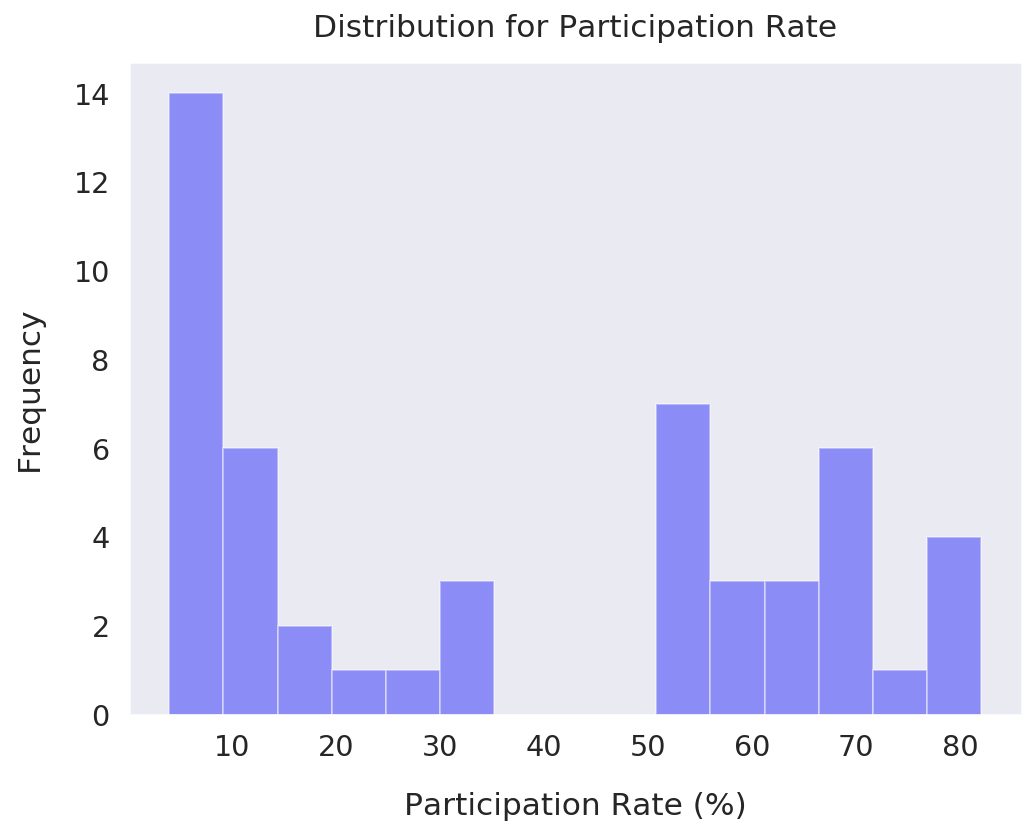

In [13]:
# Plot the distribution for "Rate".
plt.figure(figsize=(8,6))
sns.distplot(sat['Rate'], kde=False, bins=15, color='b')
plt.xlabel('Participation Rate (%)', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title('Distribution for Participation Rate', y=1.02)
plt.show()

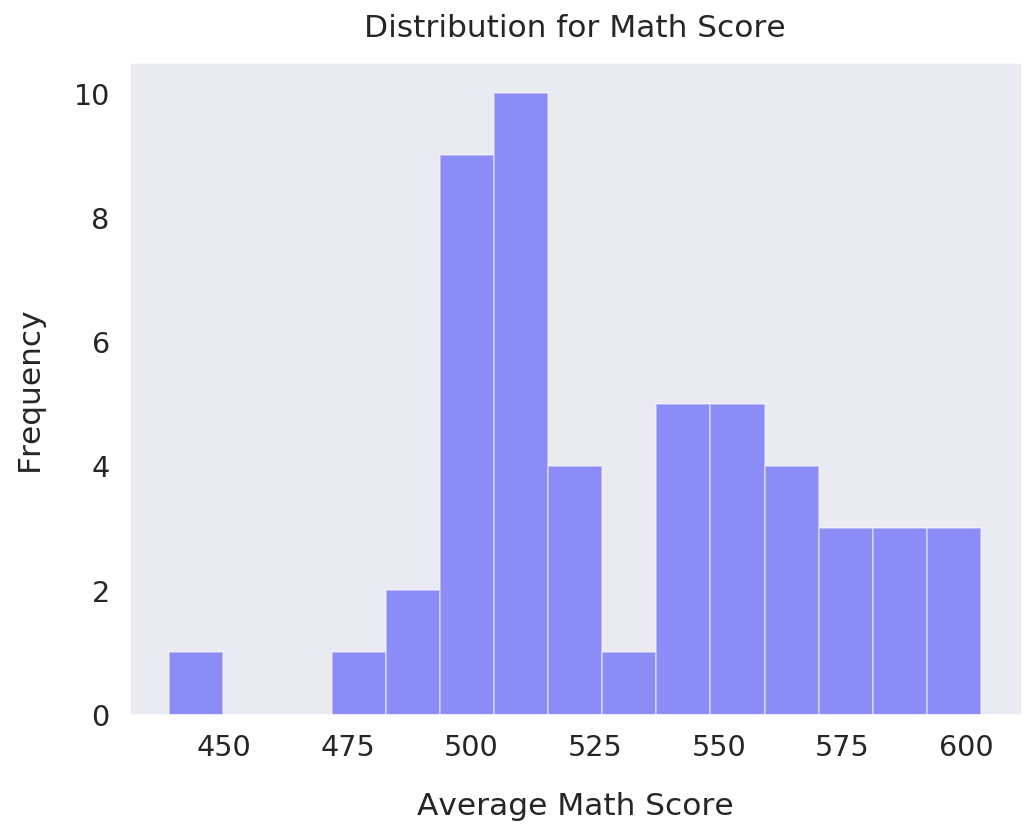

In [14]:
# Plot the distribution for "Math".
plt.figure(figsize=(8,6))
sns.distplot(sat['Math'], kde=False, bins=15, color='b')
plt.xlabel('Average Math Score', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title('Distribution for Math Score', y=1.02)
plt.show()

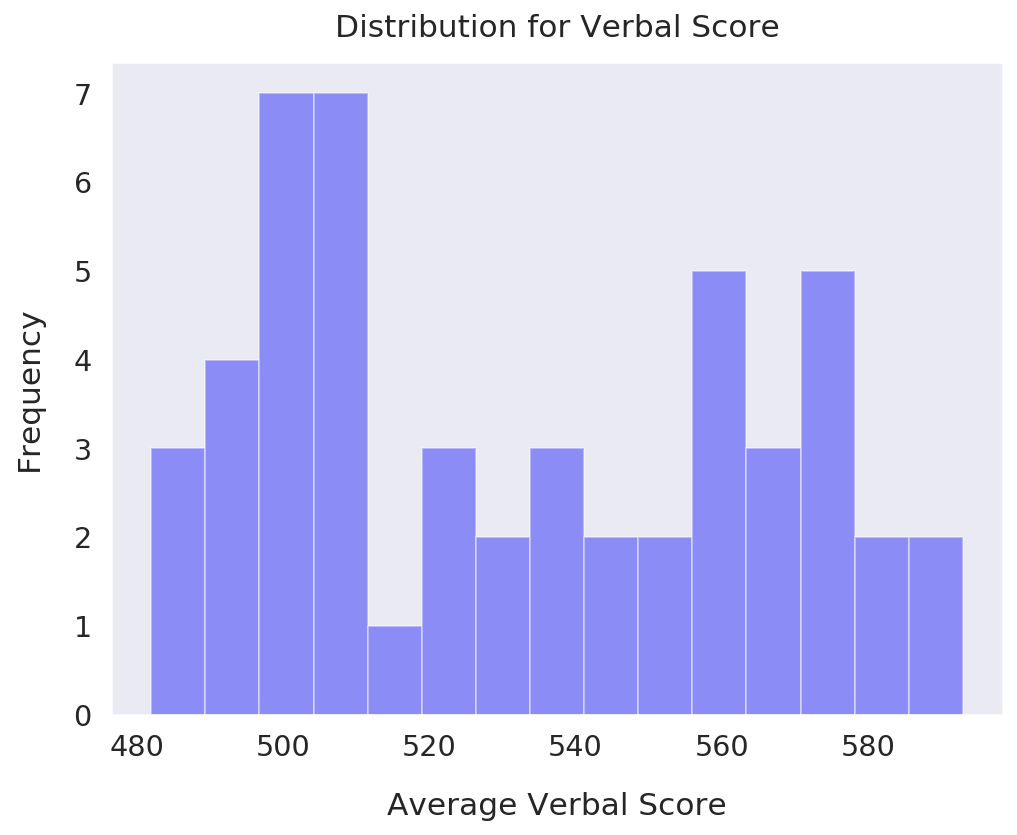

In [15]:
# Plot the distribution for "Verbal".
plt.figure(figsize=(8,6))
sns.distplot(sat['Verbal'], kde=False, bins=15, color='b')
plt.xlabel('Average Verbal Score', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title('Distribution for Verbal Score', y=1.02)
plt.show()

In [0]:
#"Verbal" and "Rate" has approximate negative exponential relationship. 
#"Verbal" decreases as "Rate" increases.


#"Math" and "Rate" has approximate negative exponential relationship. 
#"Math" decreases as "Rate" increase. Outlier is observed from the graph.


#"Math" and "Verbal" has approximate positive linear relationship. 
#"Math" increases as "Verbal" increases. Outlier is observed from the graph.

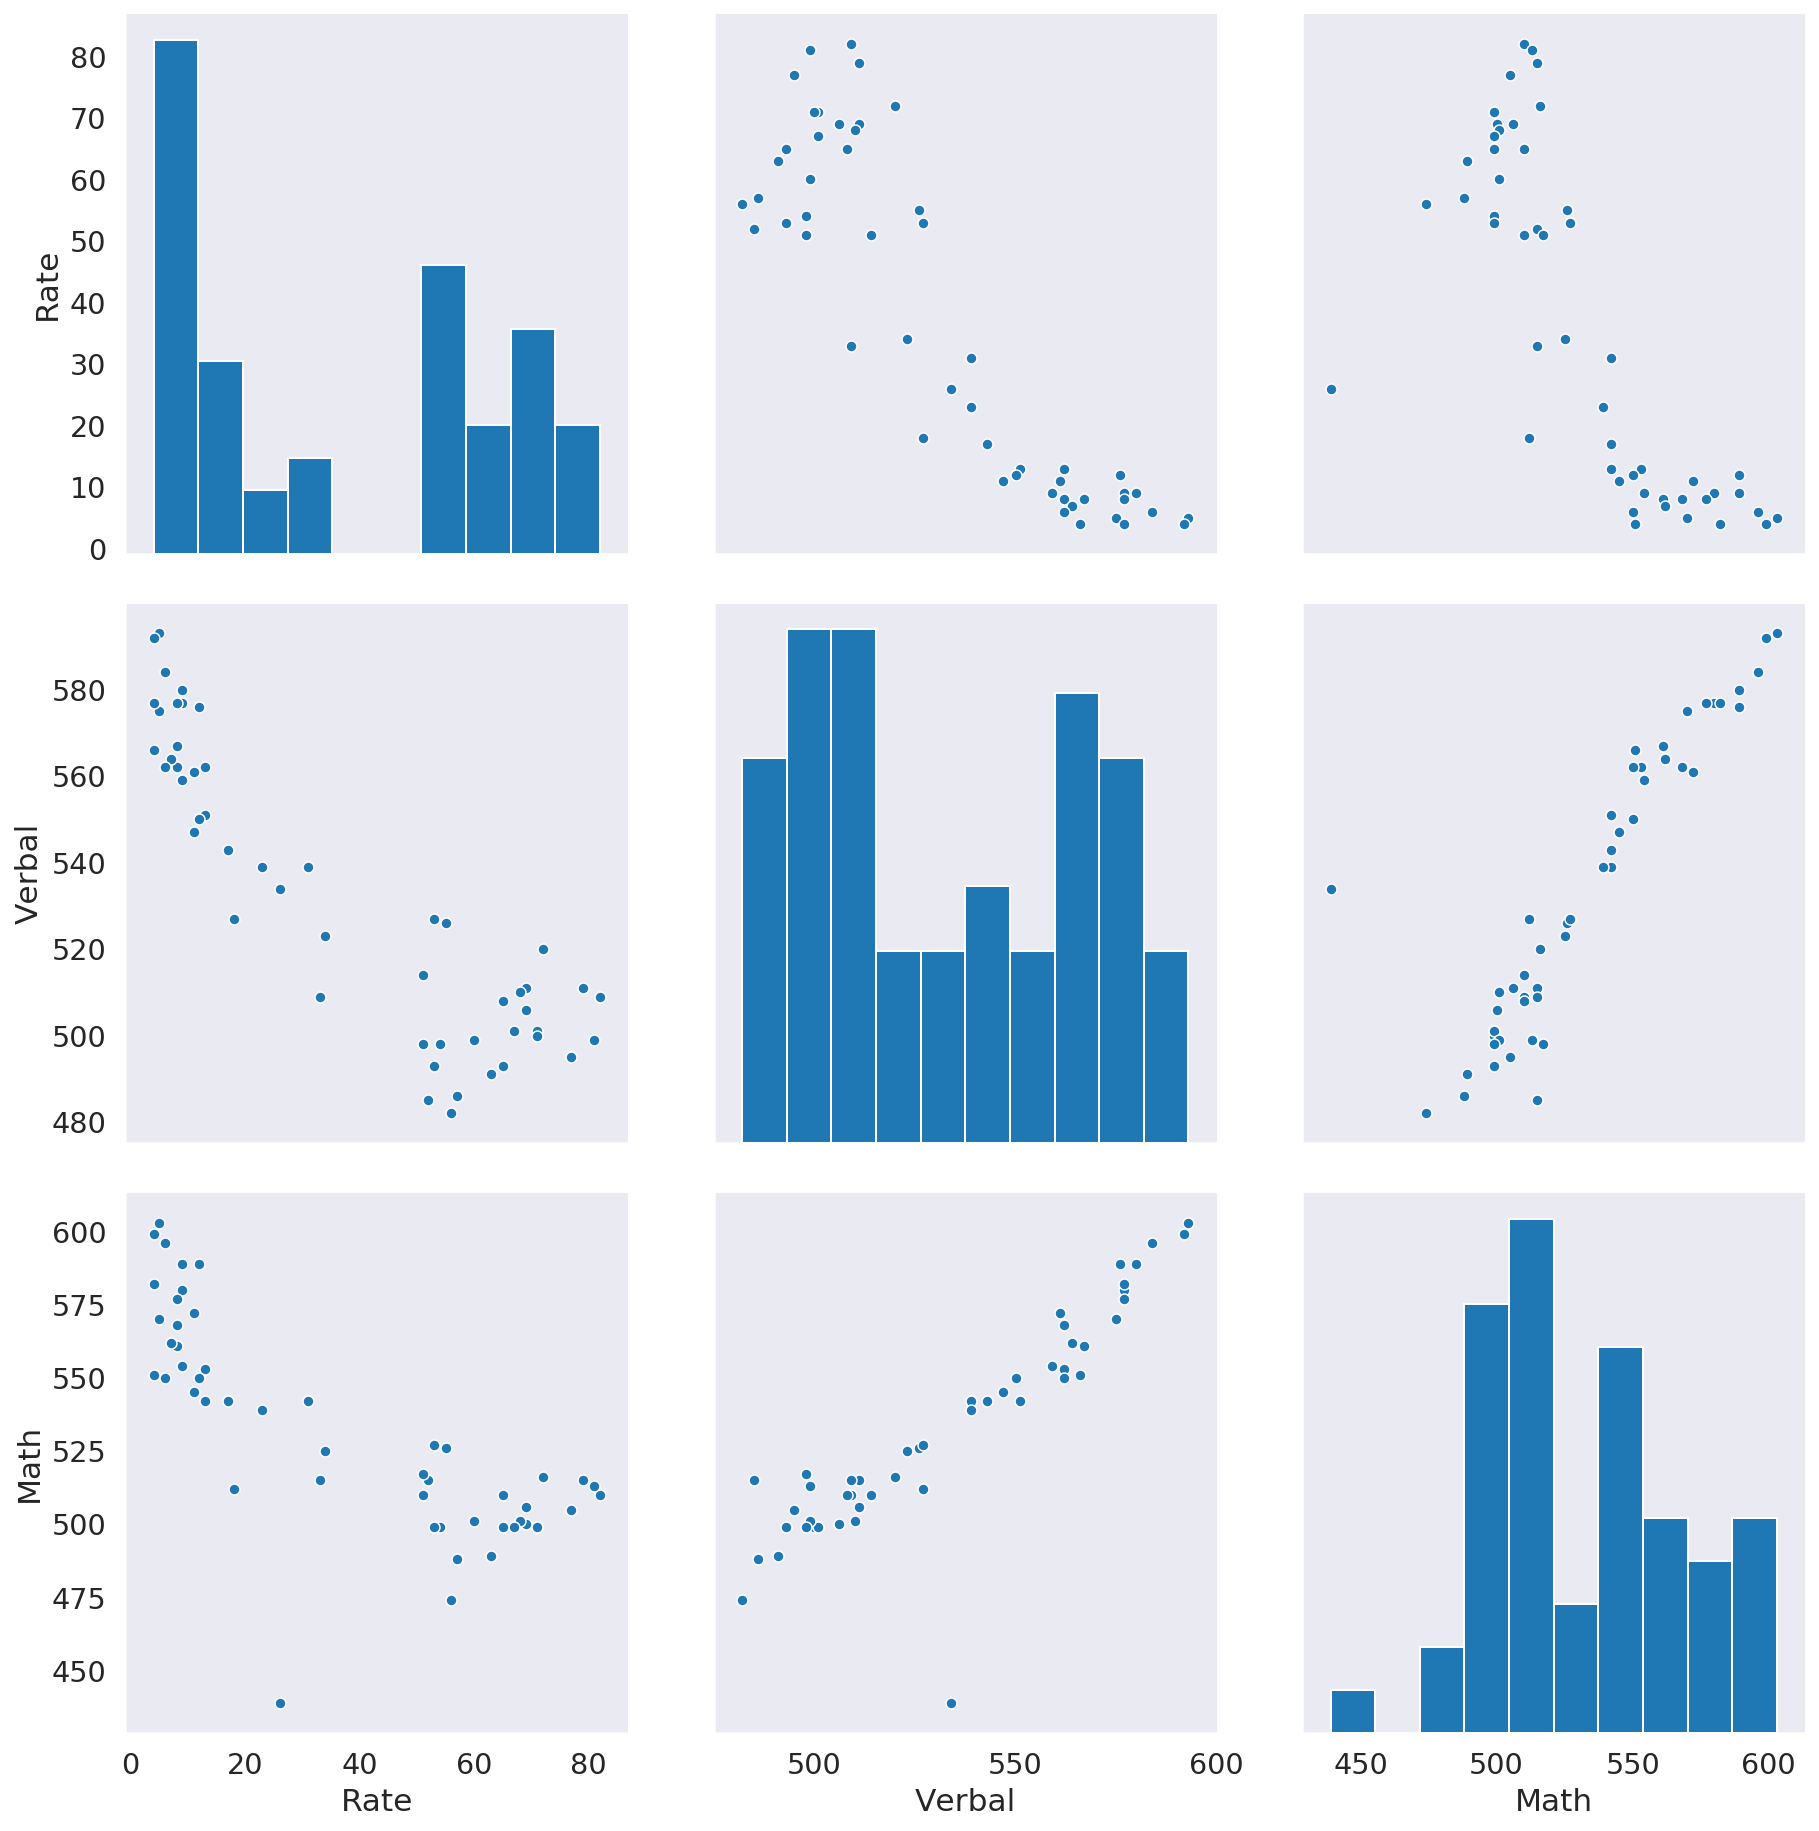

In [16]:
sns.pairplot(sat, height=4.3, plot_kws=dict(s=30))
plt.show()

In [0]:
# 4. Plot the data using built-in pandas functions

In [0]:
# 4.1 Plot a stacked histogram with Verbal and Math using pandas

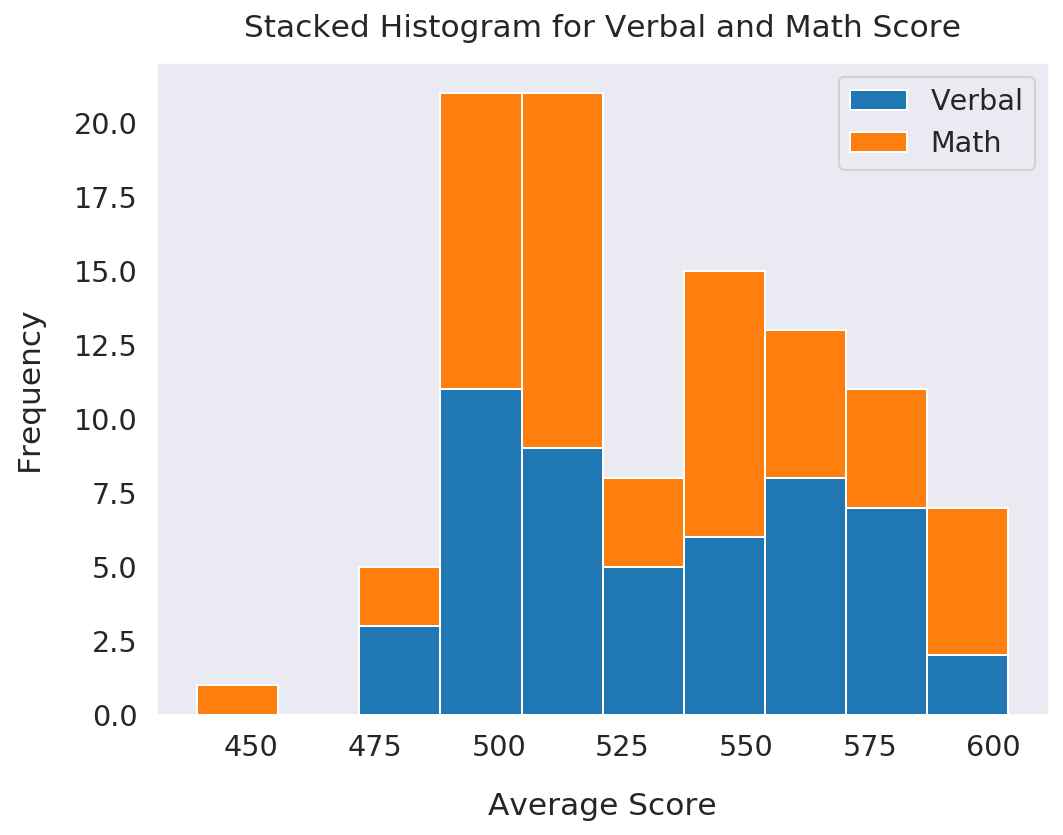

In [17]:
sat[['Verbal', 'Math']].plot.hist(stacked=True, figsize=(8,6))
plt.xlabel('Average Score', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title('Stacked Histogram for Verbal and Math Score', y=1.02)
plt.show()

In [0]:
# 4.2 Plot Verbal and Math on the same chart using boxplots

In [0]:
#Scatter plot shows relationship between two parameters and histogram shows the fequency for a group of data.

#Boxplot shows the five most important measures - minimum, first quartile, median, third quartile, 
#and the maximum in one graph. 
#We can get an overall picture of the center and deviation for each column as well as identify outliers.

In [0]:
#Since mean of "Rate" deviates far from the other two columns, 
#drawing the three columns together will force the data to be 
#scaled which would induce difficulty observing the trend.

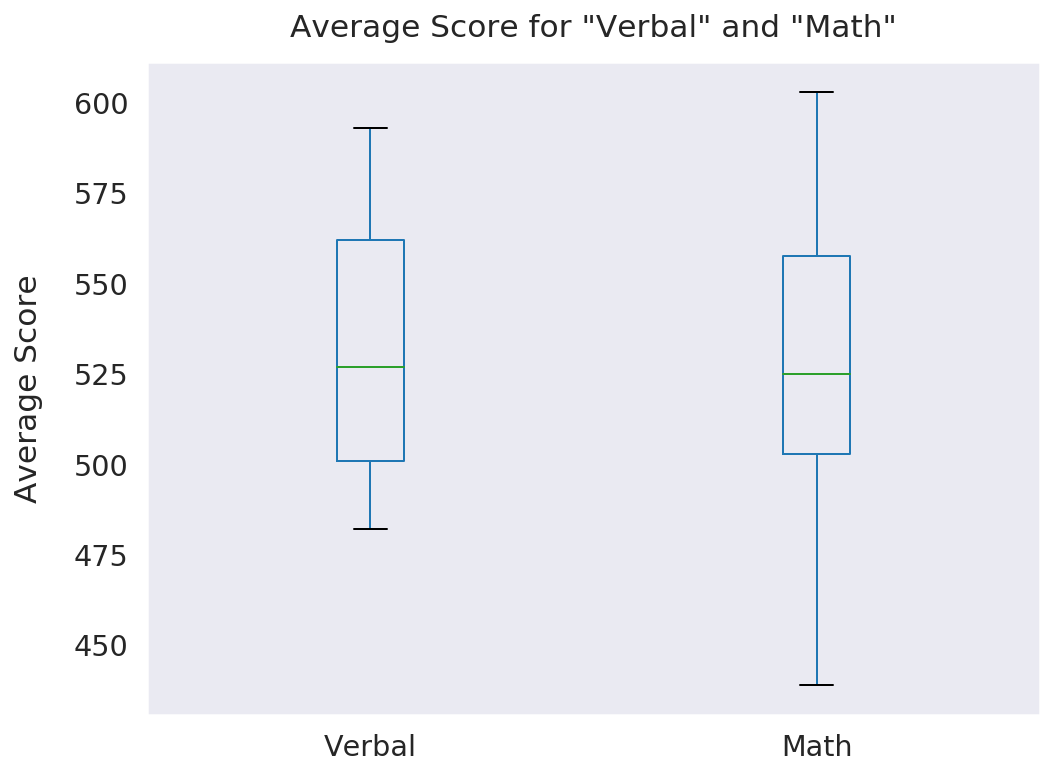

In [18]:
sat[['Verbal', 'Math']].plot.box(figsize=(8,6))
plt.title('Average Score for "Verbal" and "Math"', y=1.02)
plt.ylabel('Average Score', labelpad=15)
plt.show()

In [0]:
# 4.3 Plot Verbal, Math, and Rate appropriately on the same boxplot chart

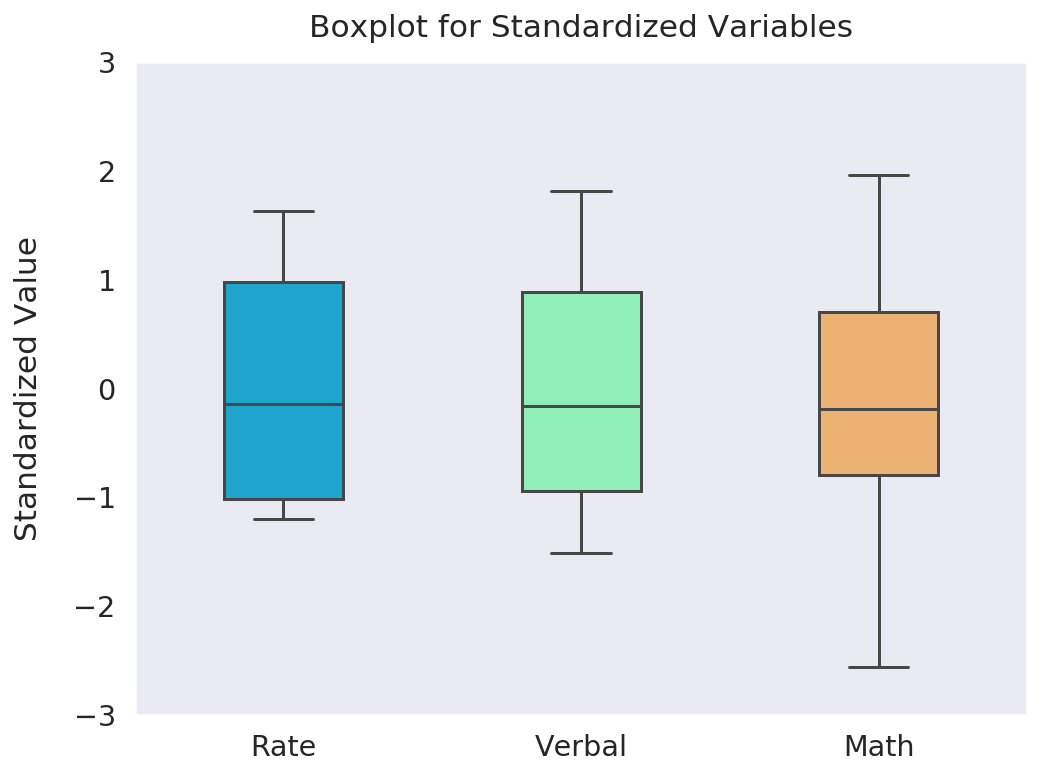

In [19]:
# Create DataFrame for Standardize variables.
sat_stand = (sat.iloc[:,1:] - sat.mean()) / sat.std()

# Plot the new DataFrame.
plt.figure(figsize=(8,6))
sns.boxplot(data=sat_stand, width=0.4, palette='rainbow')
plt.ylabel('Standardized Value', labelpad=15)
plt.title('Boxplot for Standardized Variables', y=1.02)
plt.yticks(np.arange(-3, 4, step=1))
plt.show()

In [0]:
# 5. Create and examine subsets of the data

# .iloc[row, col] : row and column are specified by index, which are integers

# .loc[row, col]  : row and column are specified by string "labels" 
#(boolean arrays are allowed; useful for rows)

#.ix[row, col]   : row and column indexers can be a mix of labels and integer indices

# How many states are above the mean? What does this tell you about the distribution of Verbal scores?
# There is 24 states above the mean. This shows that the mean is located at center of the distribution.

In [20]:
# Show list of states.
sat[sat['Verbal'] > np.mean(sat['Verbal'])]['State']

26    CO
27    OH
28    MT
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object

In [21]:
# Show no. of states.
len(sat[sat['Verbal'] > np.mean(sat['Verbal'])]['State'])

24

In [0]:
#5.2 Find the list of states that have Verbal scores greater than the median of Verbal scores across states

#How does this compare to the list of states greater than the mean of Verbal scores? Why?

#This is exactly the same list as the mean of Verbal scores. 
#This shows that the data has same mean and median and both located at center of the distribution.

In [22]:
# Show list of states.
sat[sat['Verbal'] > np.median(sat['Verbal'])]['State']

26    CO
27    OH
28    MT
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object

In [23]:
# Show no. of states.
len(sat[sat['Verbal'] > np.median(sat['Verbal'])]['State'])

24

In [0]:
#5.3 Create a column that is the difference between the Verbal and Math scores

In [0]:
# Create new column.
sat['difference'] = sat['Verbal'] - sat['Math']

In [0]:
#5.4 Create two new DataFrames showing states with the greatest difference between scores


#first DataFrame should be the 10 states with the greatest gap between Verbal 
#and Math scores where Verbal is greater than Math. 
#It should be sorted appropriately to show the ranking of states.


#second DataFrame will be the inverse: states with the greatest gap between Verbal and Math 
#such that Math is greater than Verbal. Again, this should be sorted appropriately to show rank.

#Print the header of both variables, only showing the top 3 states in each.

In [0]:
# Create new DataFrame.
high_verbal = sat.sort_values('difference', ascending=False)[:10]
high_math = sat.sort_values('difference', ascending=True)[:10]

In [26]:
# Verbal is greater than Math.
high_verbal.head(3)

,State,Rate,Verbal,Math,difference
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15


In [27]:
# Math is greater than Verbal.
high_math.head(3)

,State,Rate,Verbal,Math,difference
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


In [0]:
# 6. Examine summary statistics

In [0]:
# 6.1 Create the correlation matrix of your variables (excluding State)

In [0]:
#High negative linear relationship exists between "Math" and "Rate", 
#which indicates that average math score drops as participation rate gets higher.



#Higher negative linear relationship exists between "Verbal" and "Rate", 
#which indicates that average verbal score drops even more than math as participation rate gets higher.



#Very high positive linear relationship exists between "Math" and "Verbal", 
#which indicates that state has a high math score also has high verbal score.

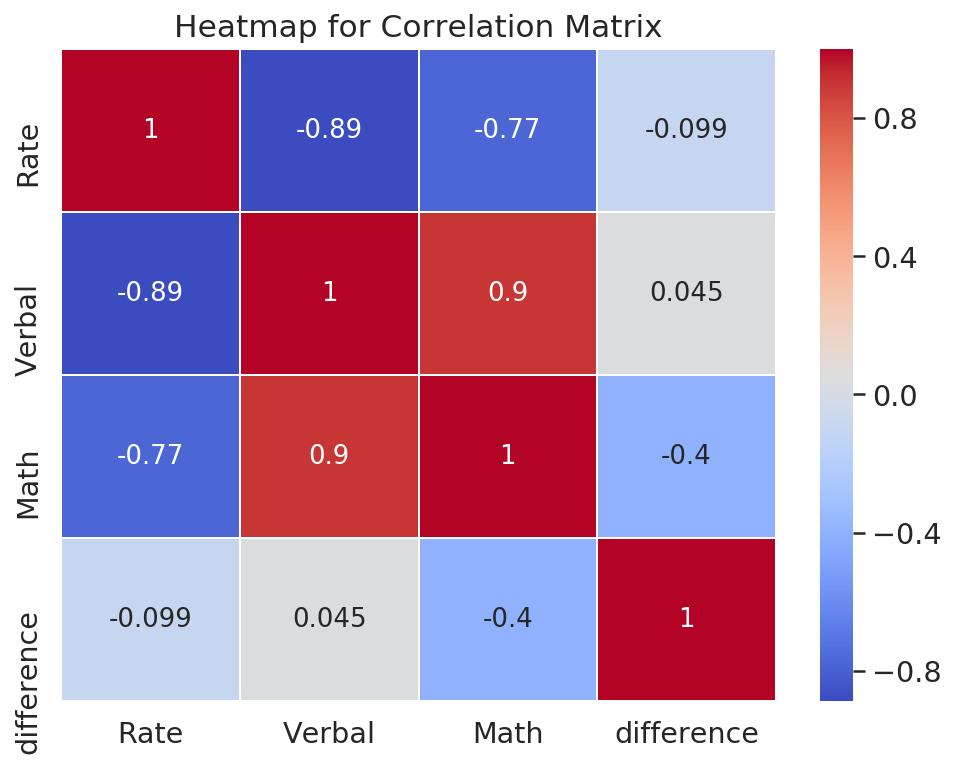

In [28]:
# Draw heatmap for correlation matrix.
plt.figure(figsize=(8,6))
sns.heatmap(sat.corr(), linewidths=.5, cmap='coolwarm', annot=True, annot_kws={"size": 13})
plt.title('Heatmap for Correlation Matrix', y=1.02)
plt.show()

In [29]:
# Calculate rule of thumb.
2 / (len(sat)**0.5)

0.28005601680560194

In [0]:
# 6.2 Use pandas' .describe() built-in function on your DataFrame

In [0]:
#count: number of non-NA/null entries for the column
#mean: average value of the column
#std: standard deviation of the column
#min: minimum value of the column
#25%: 25th percentile or 1st quartile of the column
#50%: 50th percentile or 2nd quartile or median of the column
#75%: 75th percentile or 3rd quartile of the column
#max: maximum value of the column

In [30]:
sat.describe()

,Rate,Verbal,Math,difference
count,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275
std,27.550681,33.360667,36.287393,15.839811
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,503.000000,-6.000000
50%,33.000000,527.000000,525.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000
max,82.000000,593.000000,603.000000,95.000000


In [0]:
# 6.3 Assign and print the covariance matrix for the dataset

In [0]:
#Describe how the covariance matrix is different from the correlation matrix.
#What is the process to convert the covariance into the correlation?
#Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

#Correlation is a measure of direction and strength of linear relationship between two variables. 
#Covariance only measures direction of the relationship. 
#This means that higher numerical value of covariance does not indicate a stronger linear relationship. 
#Instead, the sign is matters. 
#A positive value indicates a positive linear relationship while a negative value indicates 
#a negative relationship.


#Covariance result has no upper or lower limit while correlation is always between -1 and 1.


#Covariance is not standardized and is dependent on the scale of the variables 
#while correlation is standardized and is independent of the scale of variables.

In [0]:
#Variables are standardized and is independent of scale of variables.

#From correlation matrix we can see the strength of relationship but covariance cannot.

In [31]:
# Show covariance matrix.
sat.cov()

,Rate,Verbal,Math,difference
Rate,759.04,-816.280000,-773.220000,-43.060000
Verbal,-816.28,1112.934118,1089.404706,23.529412
Math,-773.22,1089.404706,1316.774902,-227.370196
difference,-43.06,23.529412,-227.370196,250.899608


In [0]:
# 7. Performing EDA on "drug use by age" data

In [33]:
from google.colab import files
uploaded = files.upload()

Saving drug-use-by-age.csv to drug-use-by-age.csv


In [34]:
import io
drug = pd.read_csv(io.BytesIO(uploaded['drug-use-by-age.csv']))

drug.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,-,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [35]:
# Print dataset information.
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [36]:
# Check all columns with dtypes == 'object'.
drug.select_dtypes(include=['object'])

,age,cocaine-frequency,crack-frequency,heroin-frequency,inhalant-frequency,oxycontin-frequency,meth-frequency
0,12,5.0,-,35.5,19.0,24.5,-
1,13,1.0,3.0,-,12.0,41.0,5.0
2,14,5.5,-,2.0,5.0,4.5,24.0
3,15,4.0,9.5,1.0,5.5,3.0,10.5
4,16,7.0,1.0,66.5,3.0,4.0,36.0
5,17,5.0,21.0,64.0,4.0,6.0,48.0
6,18,5.0,10.0,46.0,4.0,7.0,12.0
7,19,5.5,2.0,180.0,3.0,7.5,105.0
8,20,8.0,5.0,45.0,4.0,12.0,12.0
9,21,5.0,17.0,30.0,2.0,13.5,2.0


In [37]:
# Drop the rows with str '-'
drug.drop(drug[drug.values == '-'].index, inplace=True)

# Convert Series to float.
drug.iloc[:, 2:] = drug.iloc[:, 2:].apply(pd.to_numeric)

# Check the data type.
drug.get_dtype_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: `get_dtype_counts` has been deprecated and will be removed in a future version. For DataFrames use `.dtypes.value_counts()
  import sys


float64    26
int64       1
object      1
dtype: int64

In [0]:
# 7.2 Do a high-level, initial overview of the data

In [0]:
#Overview of the data shows that alcohol, marijuana and pain releiver are 
#the top 3 drug used among all age group over the past 1 year.


#From the correlation matrix, people who use drug tends to use more than one type of drug. 
#People who use one type of drug freqently tends to use another similar type of drug frequently as well. 
#e.g. cocaine and hallucinogen, pain releiver and oxycontin.


#Age 21-25 has the highest rate of alcohol usage. 
#Marijuana usage is higher for younger age group 18-21. Pain releiver is popular among age 17-29.


#Overall most frequently used drugs are heroin, marijuana and meth.


#The overall average use rate increasing from 15 to 21 years old and decreasing after 21 years old. 
#Age group 35-49 tends to use drug most frequently.


#Comparing drug usage between old and young age group, 
#age group 50-64 has much lower overall drug use rate than younger groups, 
#but the frequency of drug usage is higher.

In [40]:
drug.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,3421.000000,66.346154,38.538462,23.638462,50.076923,2.823077,8.807692,0.384615,15.961538,0.446154,78.076923,4.246154,6.153846,1.300000,4.807692,7.515385,12.615385,1.176923,12.846154,3.546154,8.615385,2.407692,11.346154,0.484615,39.269231,0.330769,20.461538
std,1451.202892,17.610585,18.487002,9.229801,13.002958,1.573295,8.644696,0.190815,18.502772,0.328165,73.427642,2.633950,11.393318,0.865063,3.294809,2.402723,3.708964,0.465750,11.257191,1.244063,2.623244,1.227777,5.935011,0.207550,33.001651,0.110940,28.553649
min,2223.000000,29.200000,6.000000,7.300000,25.000000,0.500000,4.000000,0.000000,1.000000,0.100000,1.000000,0.300000,2.000000,0.200000,2.000000,2.500000,7.000000,0.300000,3.000000,1.400000,4.500000,0.300000,6.000000,0.200000,2.000000,0.200000,3.000000
25%,2469.000000,58.700000,24.000000,16.400000,48.000000,1.500000,5.000000,0.400000,5.000000,0.100000,45.000000,2.100000,3.000000,0.600000,3.000000,5.900000,10.000000,0.900000,6.000000,2.400000,7.000000,1.500000,8.000000,0.300000,12.000000,0.200000,6.000000
50%,2956.000000,69.700000,52.000000,24.900000,52.000000,3.200000,5.500000,0.500000,9.500000,0.400000,57.500000,4.500000,3.000000,1.400000,4.000000,8.500000,12.000000,1.300000,12.000000,3.900000,10.000000,2.600000,10.000000,0.500000,30.000000,0.300000,10.000000
75%,3923.000000,80.700000,52.000000,33.000000,60.000000,4.100000,8.000000,0.500000,17.000000,0.600000,66.500000,6.300000,4.000000,1.800000,4.000000,9.200000,15.000000,1.500000,13.500000,4.300000,10.000000,3.300000,12.000000,0.600000,48.000000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,1.100000,280.000000,8.600000,44.000000,3.000000,13.500000,10.000000,22.000000,1.700000,46.000000,5.400000,12.000000,4.100000,24.000000,0.900000,105.000000,0.500000,104.000000


In [0]:
# Seperate the dataset into two subsets.
drug_use = drug.iloc[:, ::2]
drug_freq = drug.drop('n', axis=1).iloc[:, ::2]

# Rename the columns.
drug_use.rename(columns=lambda x: x.split('-')[0], inplace=True)
drug_freq.rename(columns=lambda x: x.split('-')[0], inplace=True)

In [0]:
drug_use.mean().sort_values().plot(kind='barh', figsize=(9,7))
plt.xlabel('Percentage (%)', labelpad=15)
plt.title('Average Rate of Drug Usage Over All Age Groups (2011-2012)', y=1.02)
plt.show()

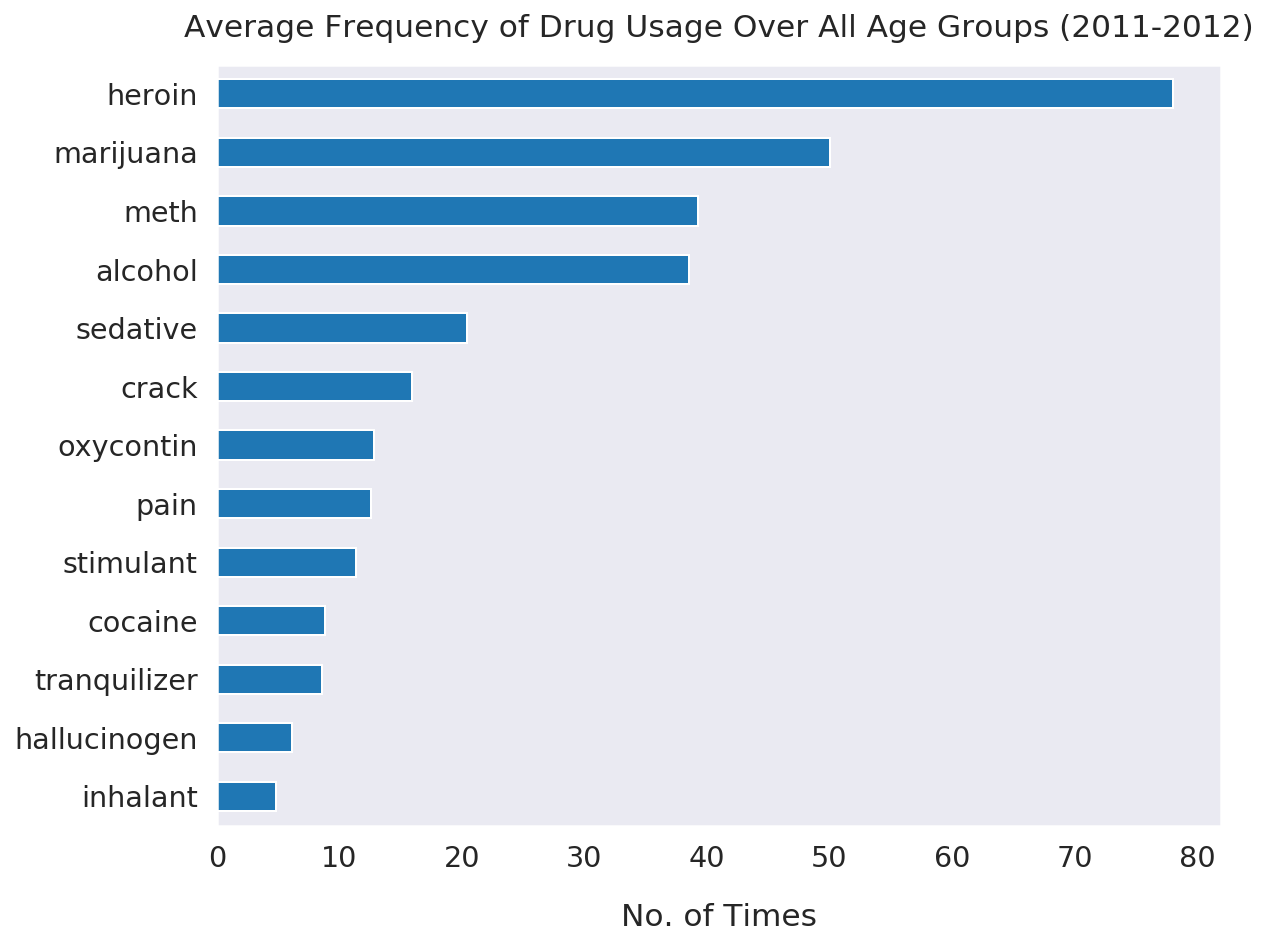

In [42]:
drug_freq.mean().sort_values().plot(kind='barh', figsize=(9,7))
plt.xlabel('No. of Times', labelpad=15)
plt.title('Average Frequency of Drug Usage Over All Age Groups (2011-2012)', y=1.02)
plt.show()

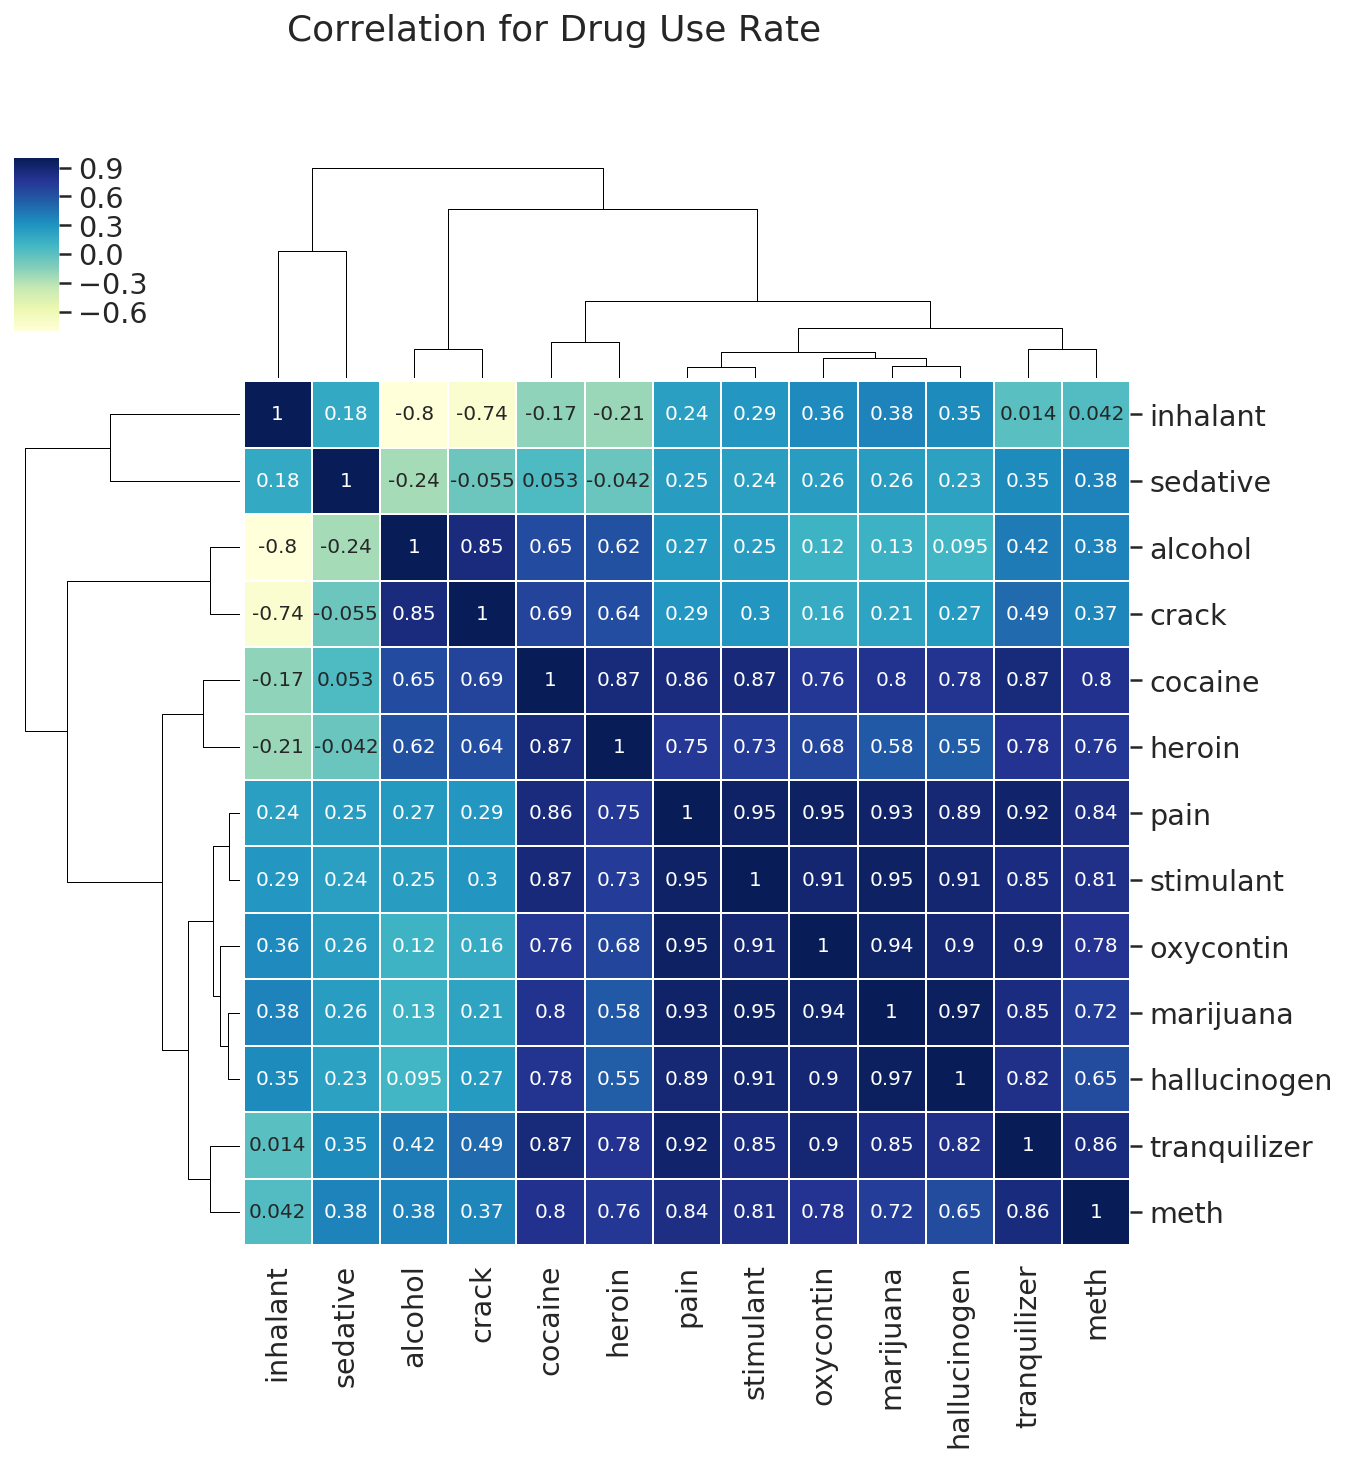

In [43]:
sns.clustermap(drug_use.corr(), cmap='YlGnBu', linewidths=.5, annot=True)\
    .fig.suptitle('Correlation for Drug Use Rate', fontsize=18) 
plt.show()

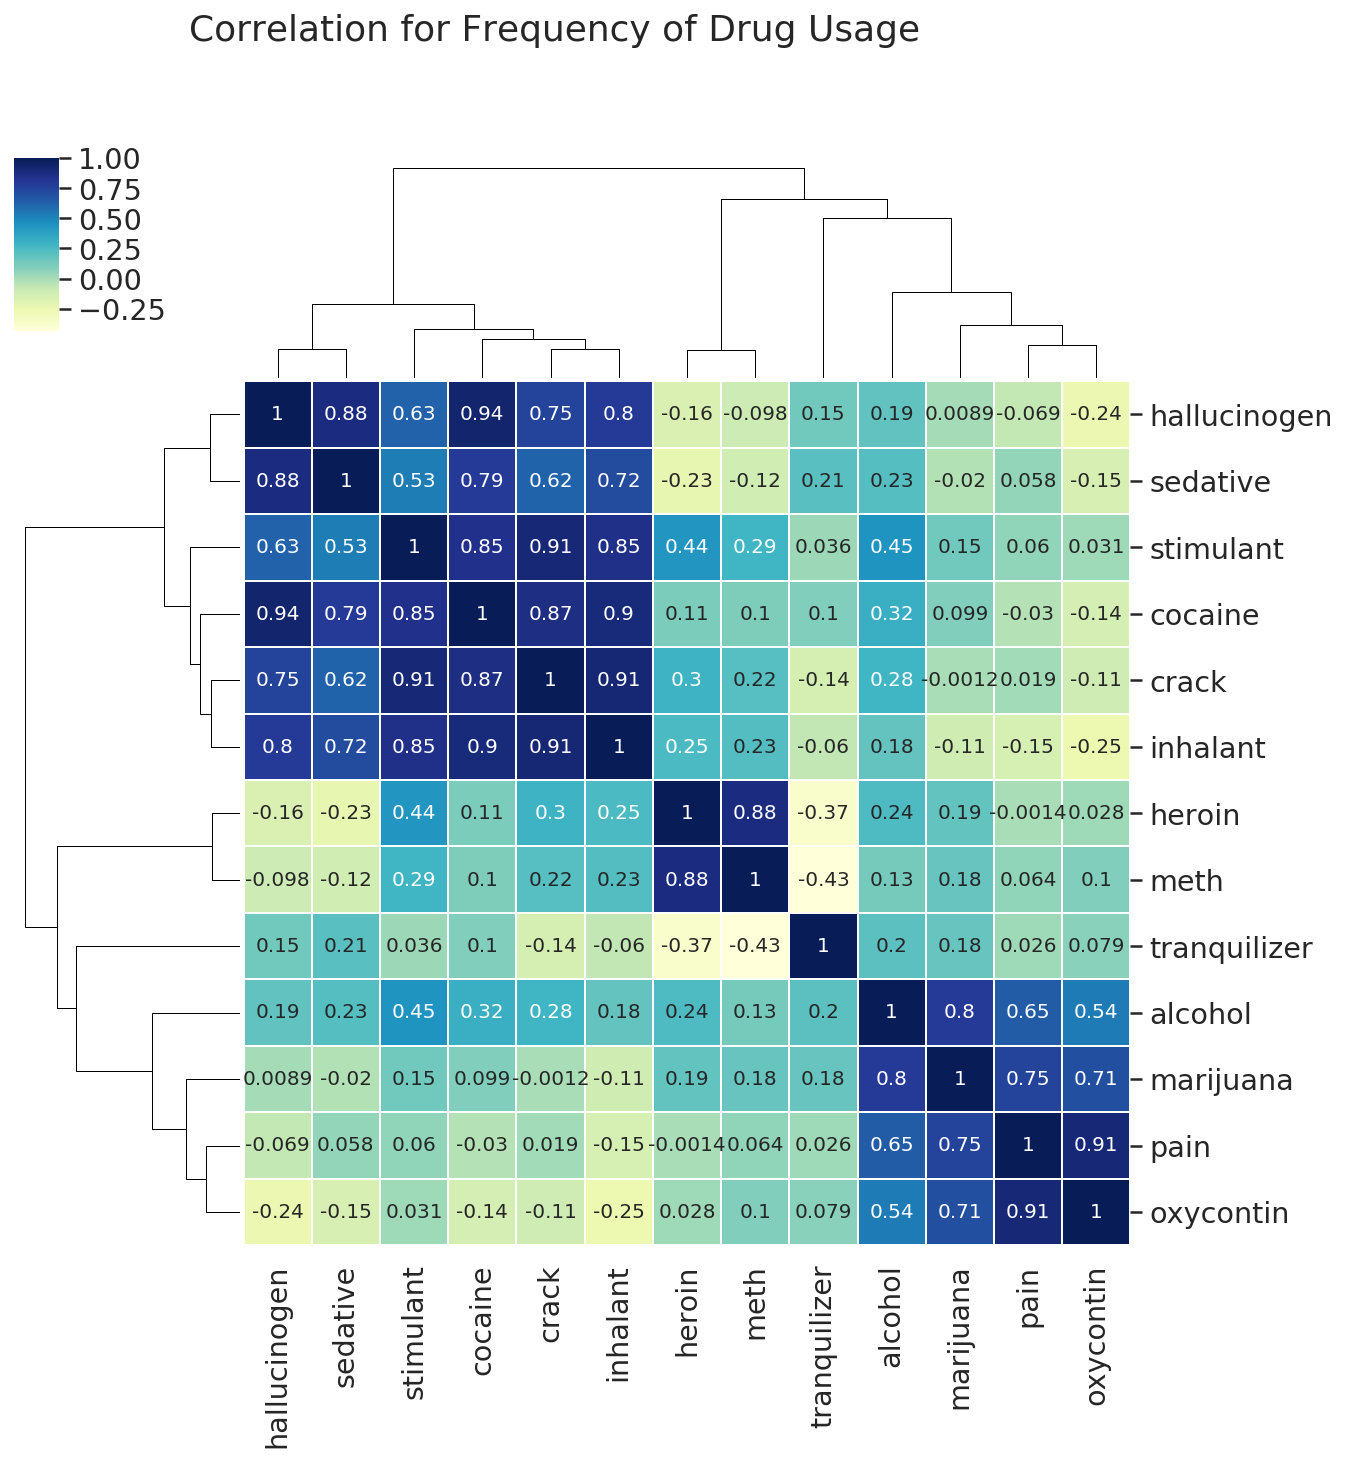

In [44]:
sns.clustermap(drug_freq.corr(), cmap='YlGnBu', linewidths=.5, annot=True)\
    .fig.suptitle('Correlation for Frequency of Drug Usage', fontsize=18) 
plt.show()

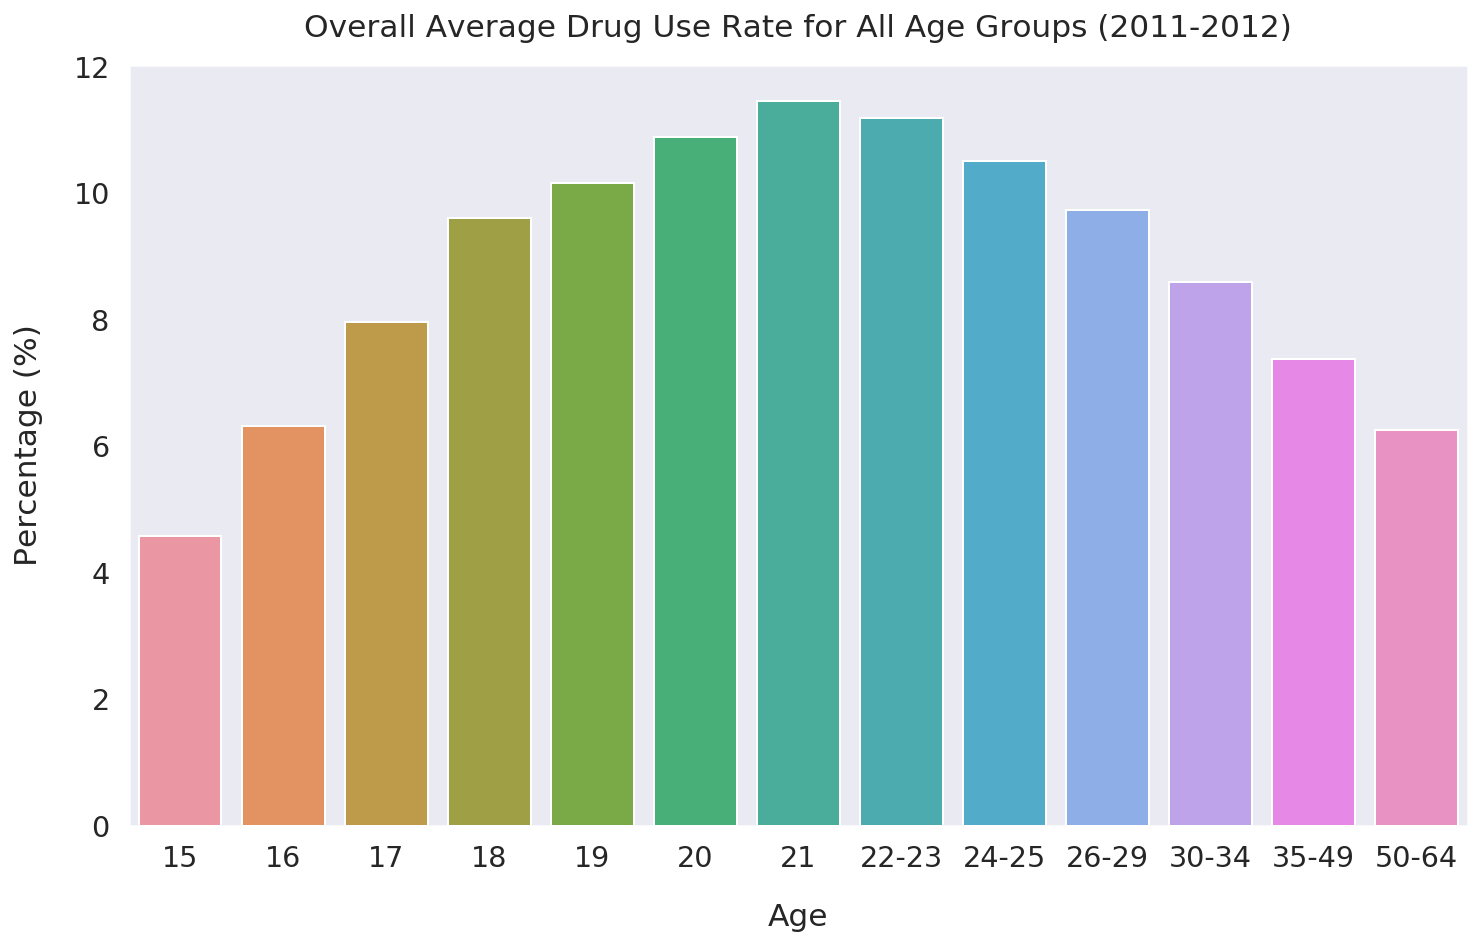

In [45]:
# Calculate average drug use rate for each age group.
drug_use['average'] = drug_use.mean(axis=1)

plt.figure(figsize=(12,7))
sns.barplot(x='age', y='average', data=drug_use)
plt.xlabel('Age', labelpad=15)
plt.ylabel('Percentage (%)', labelpad=15)
plt.title('Overall Average Drug Use Rate for All Age Groups (2011-2012)', y=1.02)
plt.show()

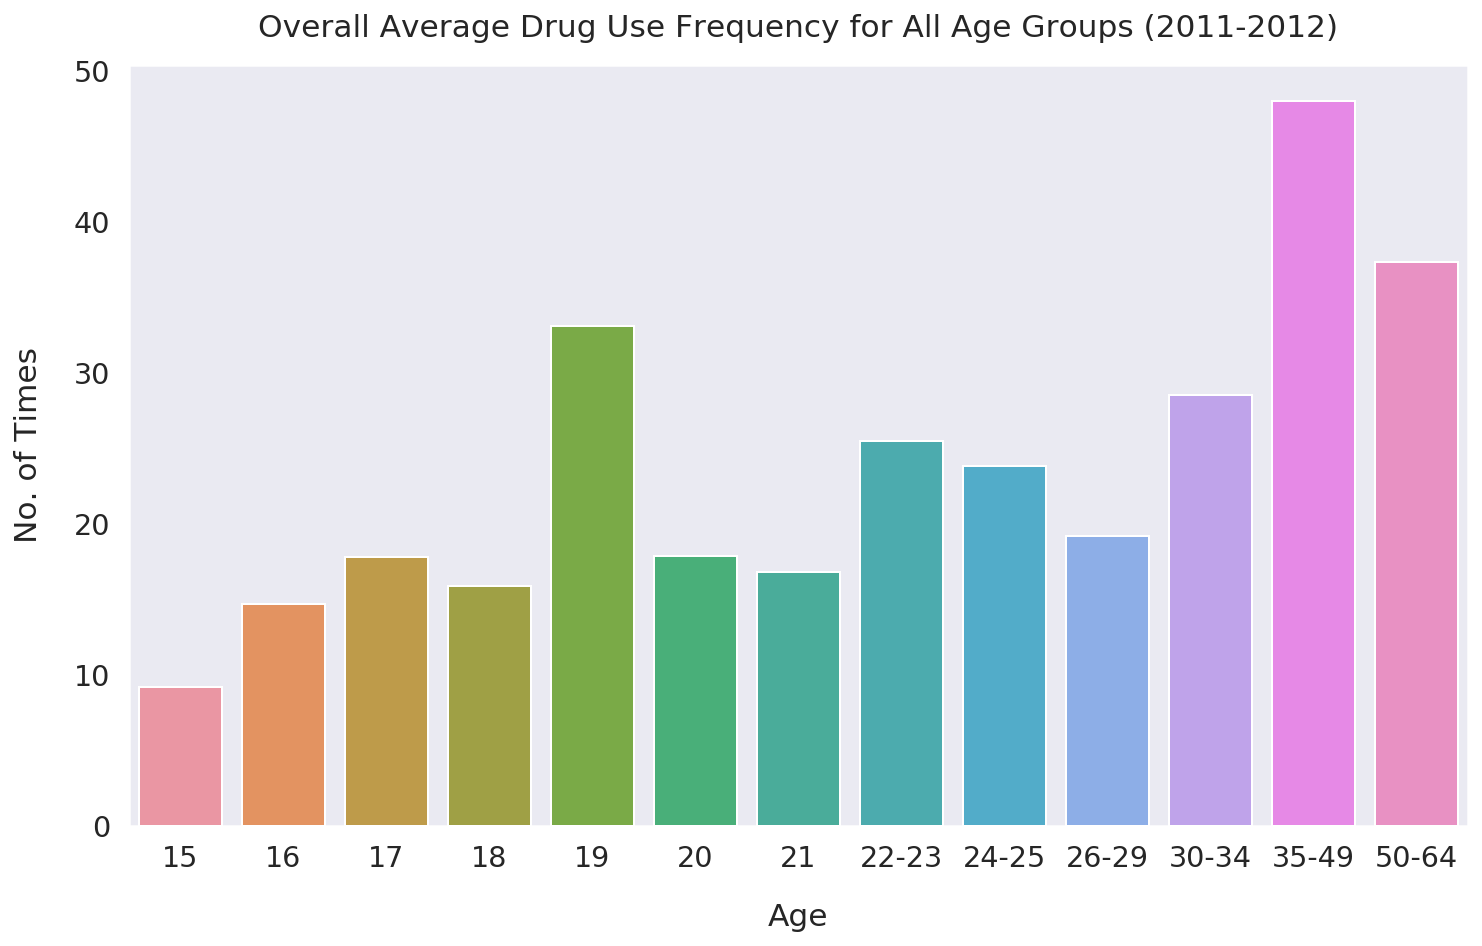

In [46]:
# Calculate average drug use frequency for each age group.
drug_freq['average'] = drug_freq.mean(axis=1)

plt.figure(figsize=(12,7))
sns.barplot(x='age', y='average', data=drug_freq)
plt.xlabel('Age', labelpad=15)
plt.ylabel('No. of Times', labelpad=15)
plt.title('Overall Average Drug Use Frequency for All Age Groups (2011-2012)', y=1.02)
plt.show()

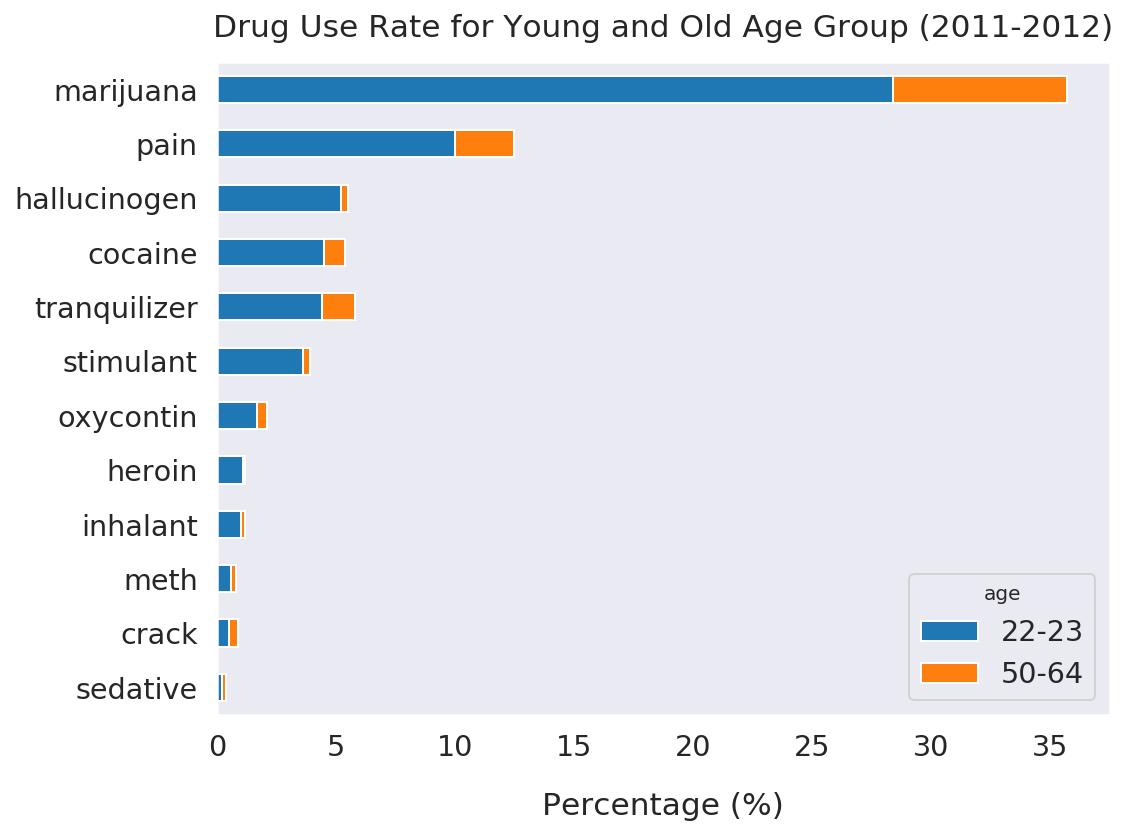

In [47]:
# Set index.
drug_use.set_index('age', inplace=True)
drug_freq.set_index('age', inplace=True)
# Excluding alcohol.
drug_use.iloc[[7,12], 1:-1].T.sort_values('22-23').plot(kind='barh', figsize=(8,6), stacked=True)
plt.xlabel('Percentage (%)', labelpad=15)
plt.title('Drug Use Rate for Young and Old Age Group (2011-2012)', y=1.02)
plt.show()

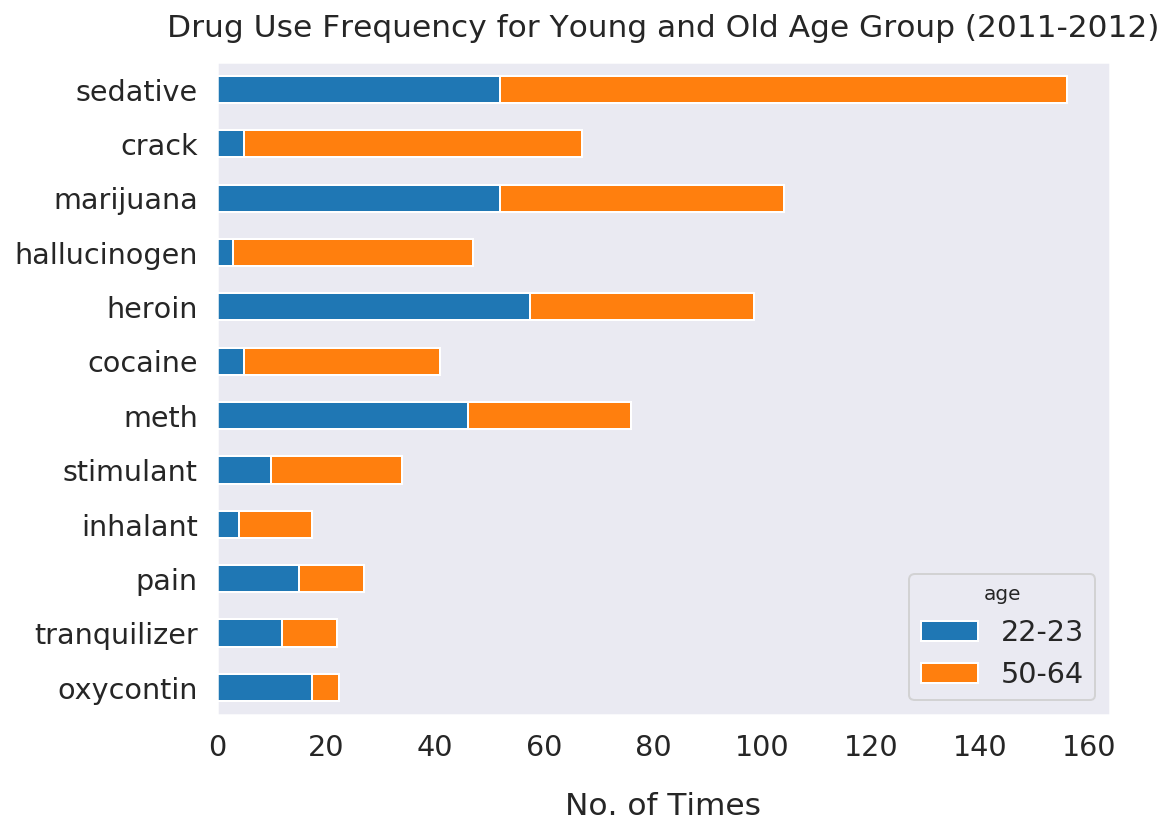

In [48]:
# Excluding alcohol.
drug_freq.iloc[[7,12], 1:-1].T.sort_values('50-64').plot(kind='barh', figsize=(8,6), stacked=True)
plt.xlabel('No. of Times', labelpad=15)
plt.title('Drug Use Frequency for Young and Old Age Group (2011-2012)', y=1.02)
plt.show()

In [0]:
# Create function to plot figures.
def plot(col1, col2, name):
    """Plot percentage and frequency of drug usage for same drug type.
    
    Args:
        col1 (str): Column name representing the % of drug use.
        col2 (str): Column representing frequency of drug use.
        name (str): Name of the drug in title case.

    Returns:
        Primary axis showing percentage of drug use.
        Secondary axis showing frequency of drug use.
        
    """
    # Plot two axes on the same graph.
    fig = plt.figure(figsize=(12,7))
    ax1 = fig.gca()
    ax1 = sns.barplot(x='age', y=col1, data=drug, ax=ax1,
                      color='#3498f9', label='% Use')
    ax2 = plt.twinx()
    sns.lineplot(x='age', y=col2, data=drug, ax=ax2, 
                 color='r', marker='s', lw=3, label='No. of Times')
    
    # Group the two legends
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0, fontsize=16)

    # Set XY labels and title.
    ax1.set_xlabel('Age', fontsize=16, labelpad=15)
    ax1.set_ylabel('Percentage (%)', color='#3498f9', fontsize=16, labelpad=15)
    ax2.set_ylabel('No. of Times', color='red', fontsize=16, labelpad=15)
    plt.title('{} Usage Over All Age Groups (2011-2012)'.format(name), y=1.02)
    
    # Set yticks label color.
    for label in ax1.get_yticklabels():
        label.set_color("#3498f9")
    for label in ax2.get_yticklabels():
        label.set_color("red")

    return plt.show()

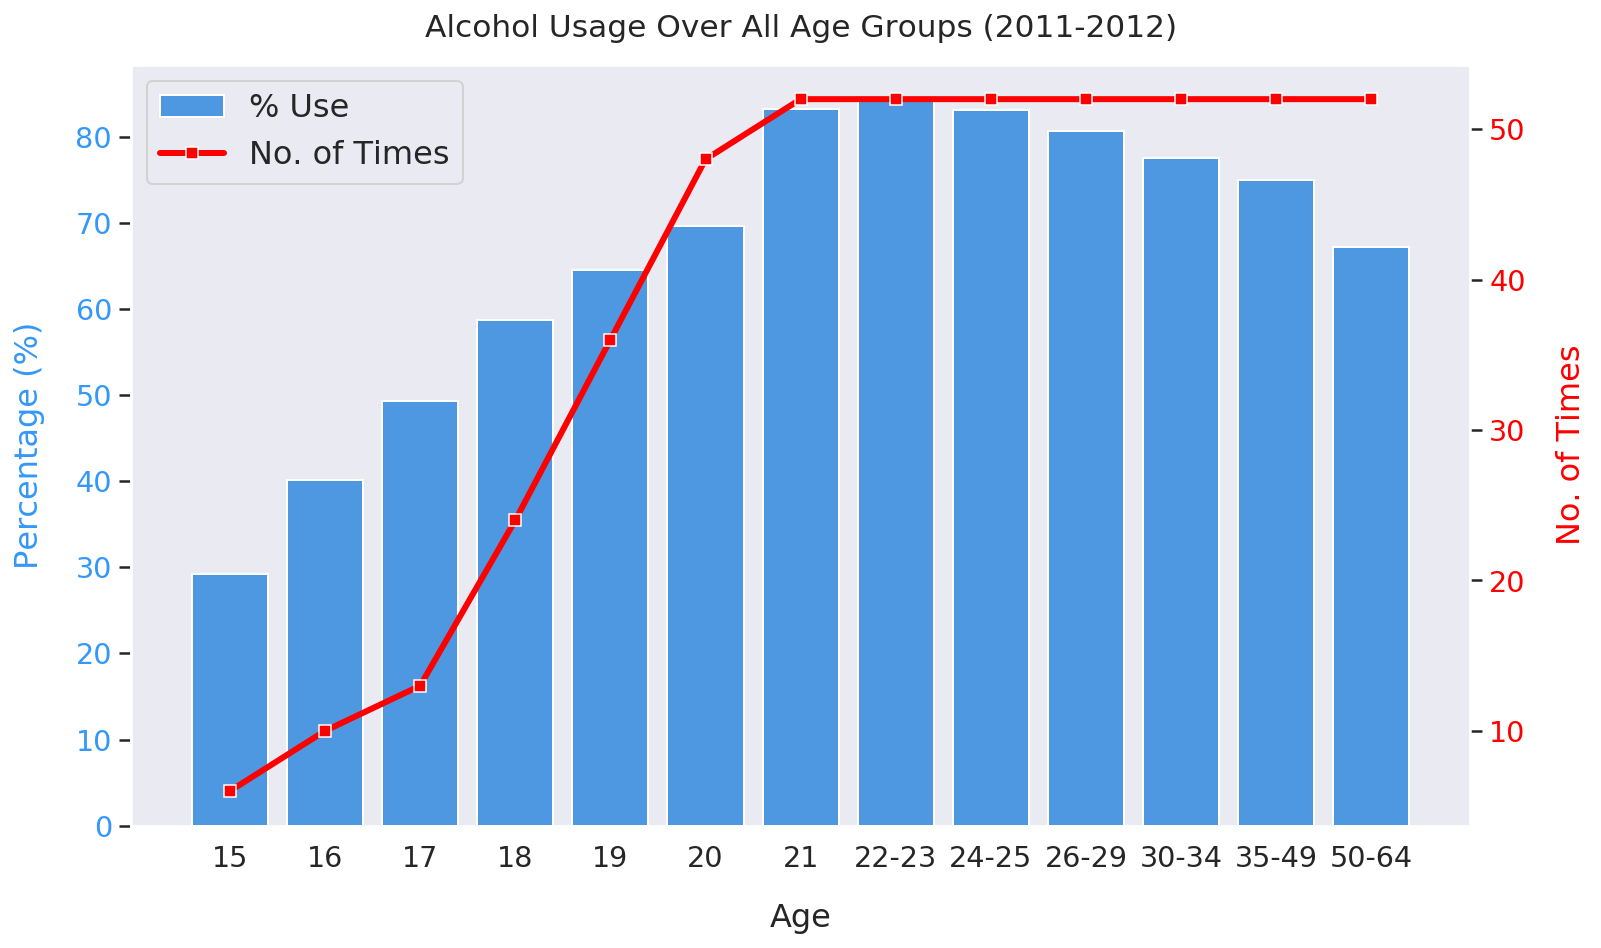

In [50]:
plot('alcohol-use', 'alcohol-frequency', 'Alcohol')

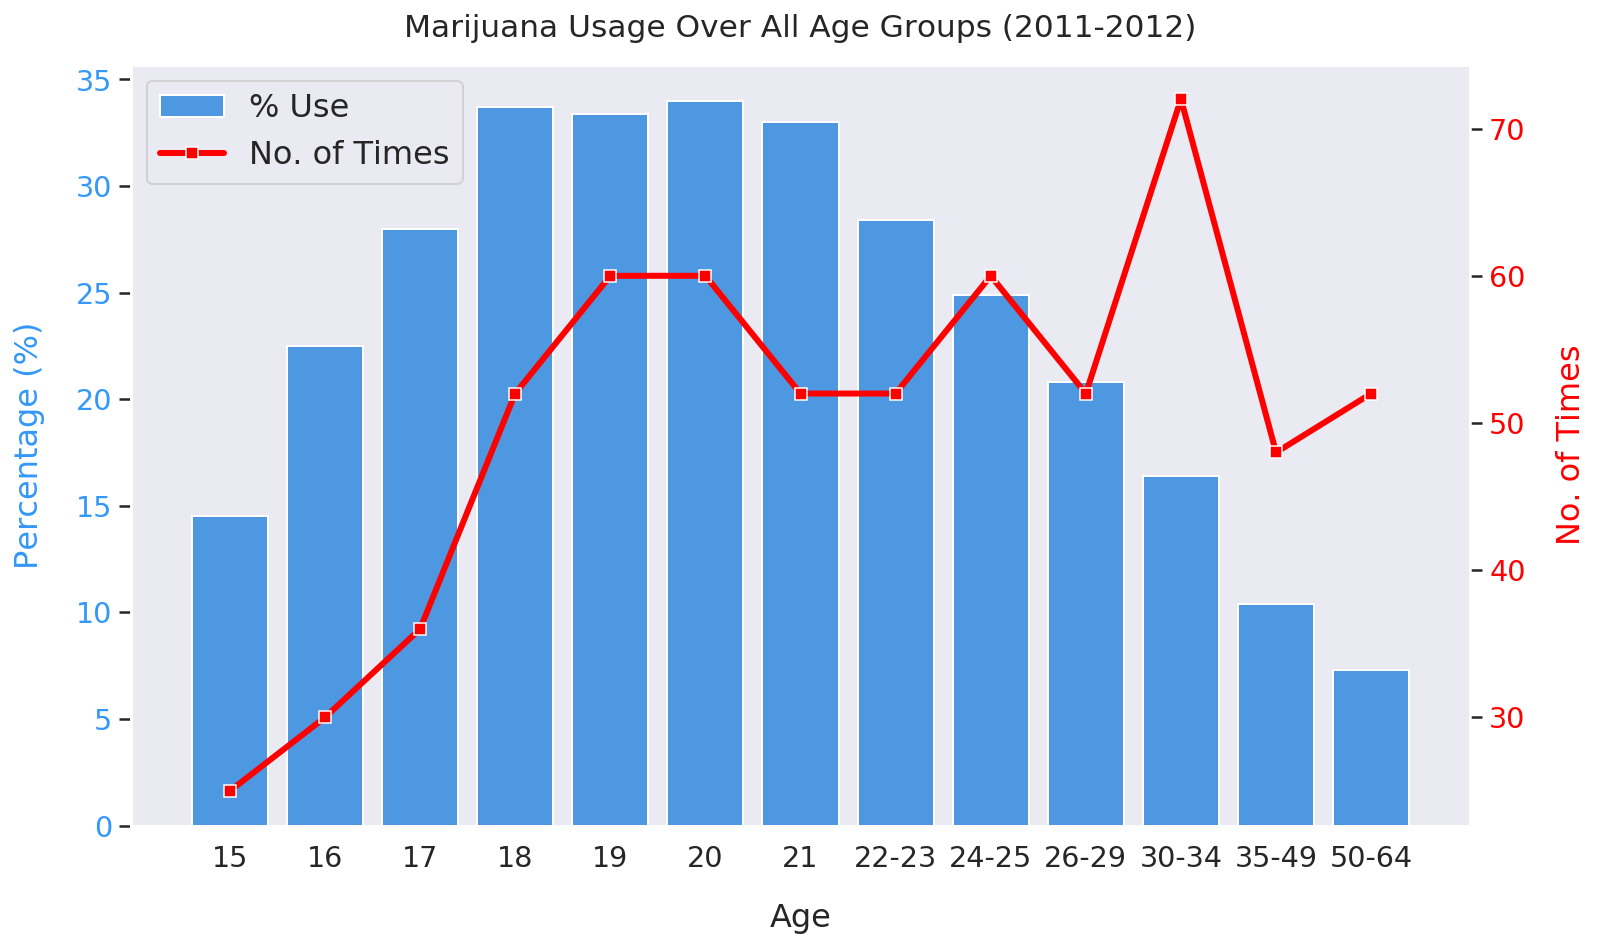

In [51]:
plot('marijuana-use', 'marijuana-frequency', 'Marijuana')

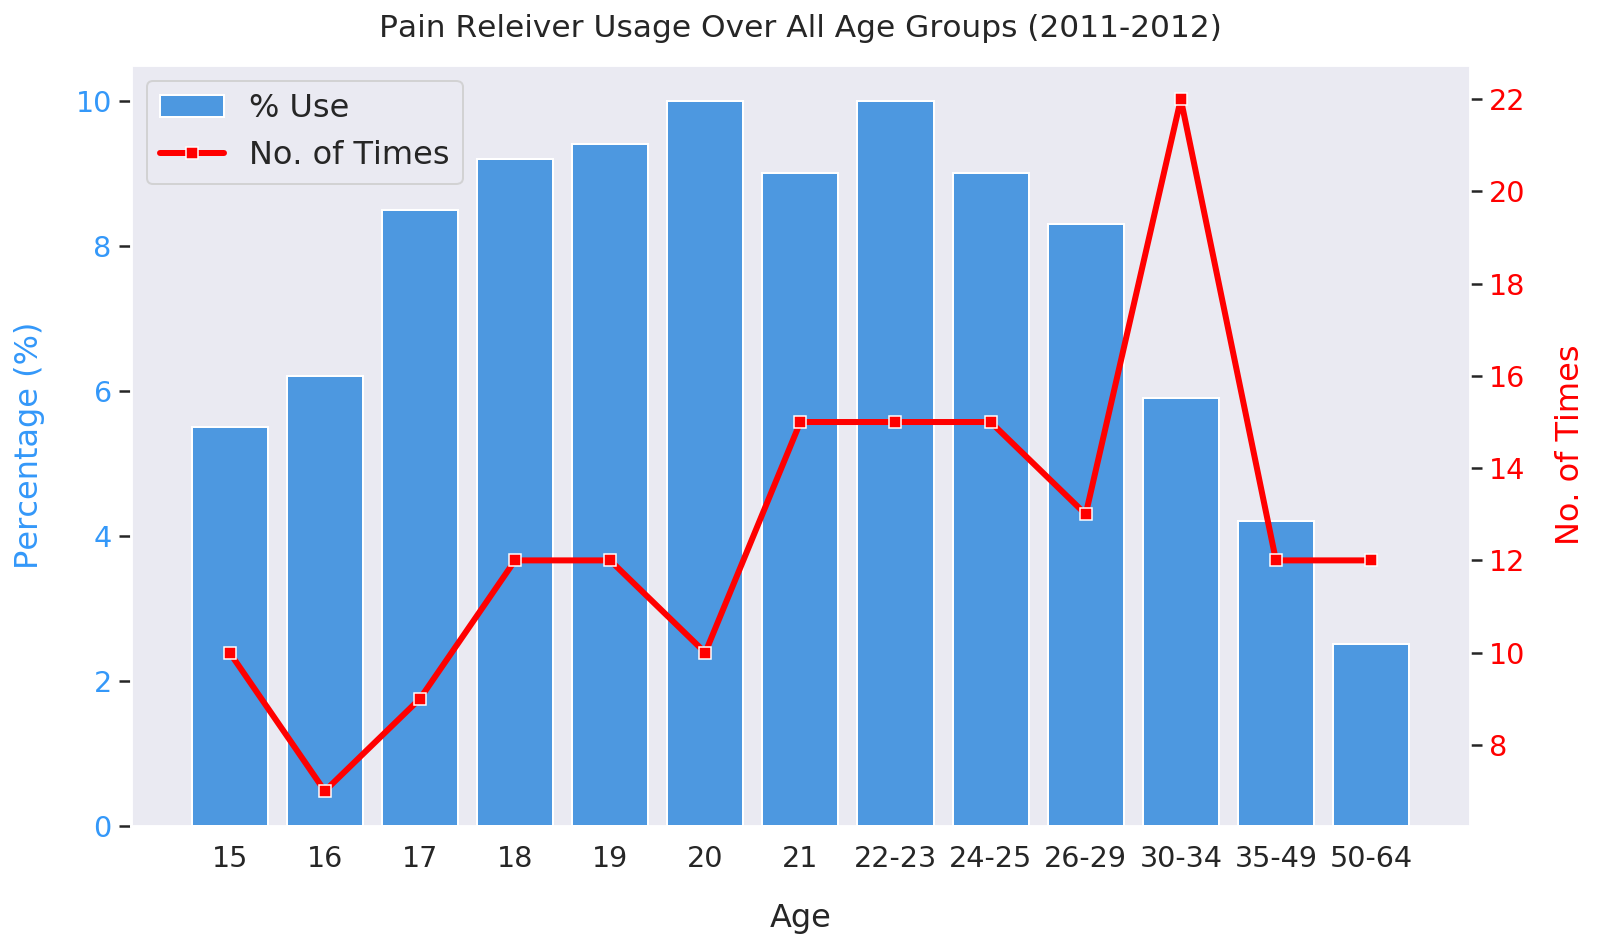

In [52]:
plot('pain-releiver-use', 'pain-releiver-frequency', 'Pain Releiver')

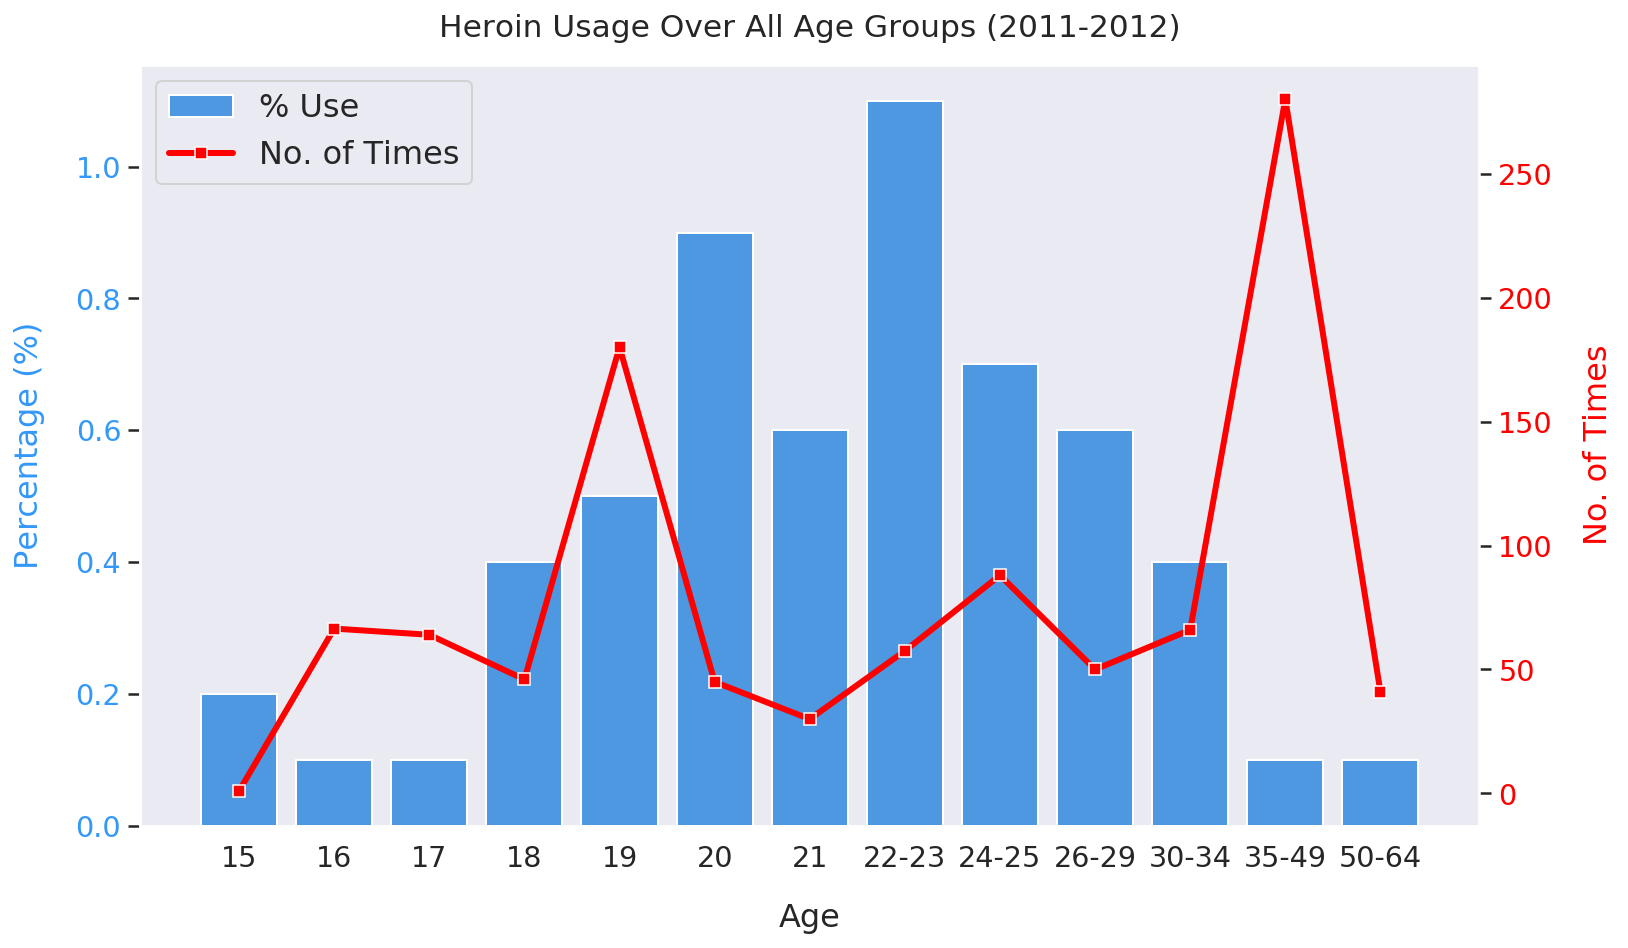

In [53]:
plot('heroin-use', 'heroin-frequency', 'Heroin')

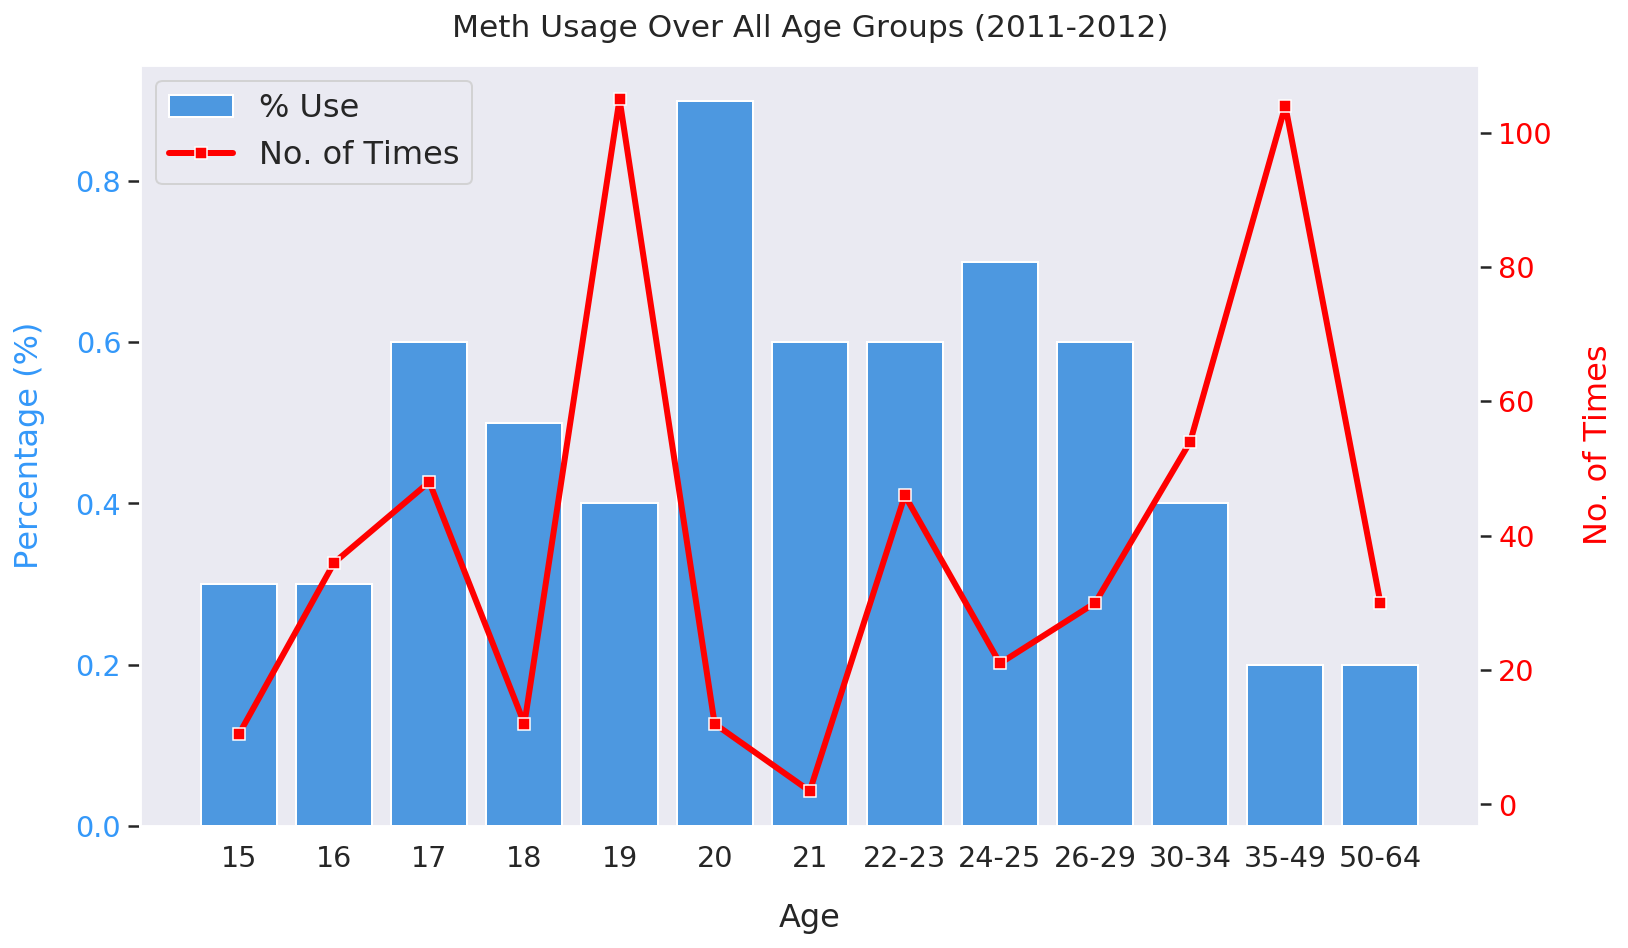

In [54]:
plot('meth-use', 'meth-frequency', 'Meth')

In [0]:
# 7.3 Create a testable hypothesis about this data

In [55]:
group1 = drug_use['cocaine'].values
group2 = drug_use['stimulant'].values
t_statistic, p_value = stats.ttest_ind(group1, group2, equal_var=False)
print("t_statistic = {}  p_value = {}".format(t_statistic, p_value))

t_statistic = 0.7504706393917666  p_value = 0.46069303275854734


In [0]:
#p > 0.05

#We cannot reject the null hypothesis (H0)

#We cannot conclude that there is a statistically significant difference between cocaine and stimulant 
#use rate.

In [0]:
# 8. dealing with outliers

In [0]:
# Take out the rate variable.
sat = sat.iloc[:, 1:]

In [61]:
# Calculate the Z-score.
sat_z = pd.DataFrame(np.abs(stats.zscore(sat)), columns=['z_verbal', 'z_math'])
sat_z.head()

,z_verbal,z_math
0,0.607938,0.107517
1,0.524442,0.936401
2,0.468778,0.298798
3,0.747098,0.681360
4,0.440946,0.211284


In [62]:
# Identify outliers
sat_z[(sat_z > 2) | (sat_z < -2)].dropna(thresh=1)

,z_verbal,z_math
27,2.58401,6.013468


In [63]:
# Drop outliers for "Math".
sat_math = sat['Math'].drop(index=[27,47])
print('-'*15)
print('Original')
print('-'*15)
print('Mean: {}'.format(sat['Math'].mean()))
print('Median: {}'.format(sat['Math'].median()))
print('Std: {:.2f}'.format(sat['Math'].std()))
print('-'*15)
print('Cleaned')
print('-'*15)
print('Mean: {}'.format(sat_math.mean()))
print('Median: {}'.format(sat_math.median()))
print('Std: {:.2f}'.format(sat_math.std()))

---------------
Original
---------------
Mean: 531.843137254902
Median: 525.0
Std: 36.29
---------------
Cleaned
---------------
Mean: 532.2857142857143
Median: 525.0
Std: 32.96


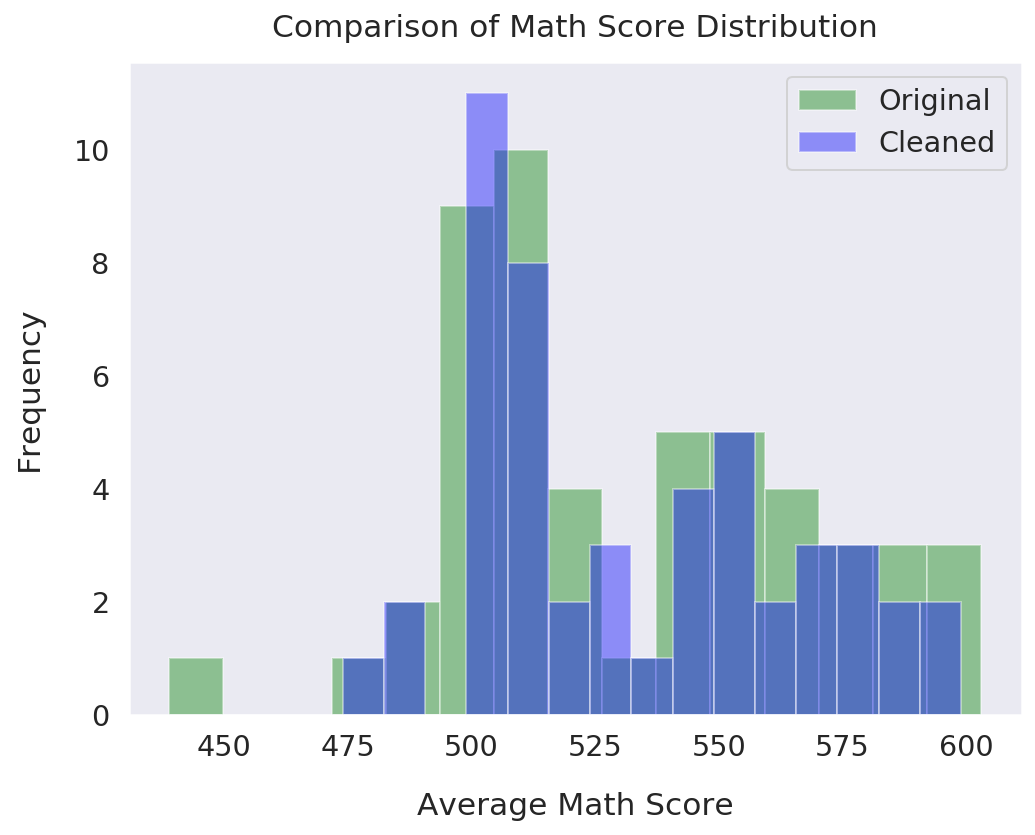

In [64]:
# Compare distribution before and after cleaning.
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(sat['Math'], bins=15, ax=ax, kde=False, label='Original', color='g')
sns.distplot(sat_math, bins=15, ax=ax, kde=False, label='Cleaned', color='b')
ax.legend()
plt.xlabel('Average Math Score', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title('Comparison of Math Score Distribution', y=1.02)
plt.show()

In [0]:
# 9. Percentile scoring and spearman rank correlation

In [65]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

In [68]:
from google.colab import files
uploaded = files.upload()

Saving sat_scores.csv to sat_scores (1).csv


In [0]:
import io
sat = pd.read_csv(io.BytesIO(uploaded['sat_scores.csv']))

In [70]:
sat = sat[:51]

# Create a new column of percentile score for "Rate".
sat['Rate_percentile'] = sat['Rate'].apply(lambda x: stats.percentileofscore(sat['Rate'], x, kind='rank'))

# Show the percentile of California.
sat.loc[sat['State'] == 'CA']

,State,Rate,Verbal,Math,Rate_percentile
23,CA,51,498,517,55.882353


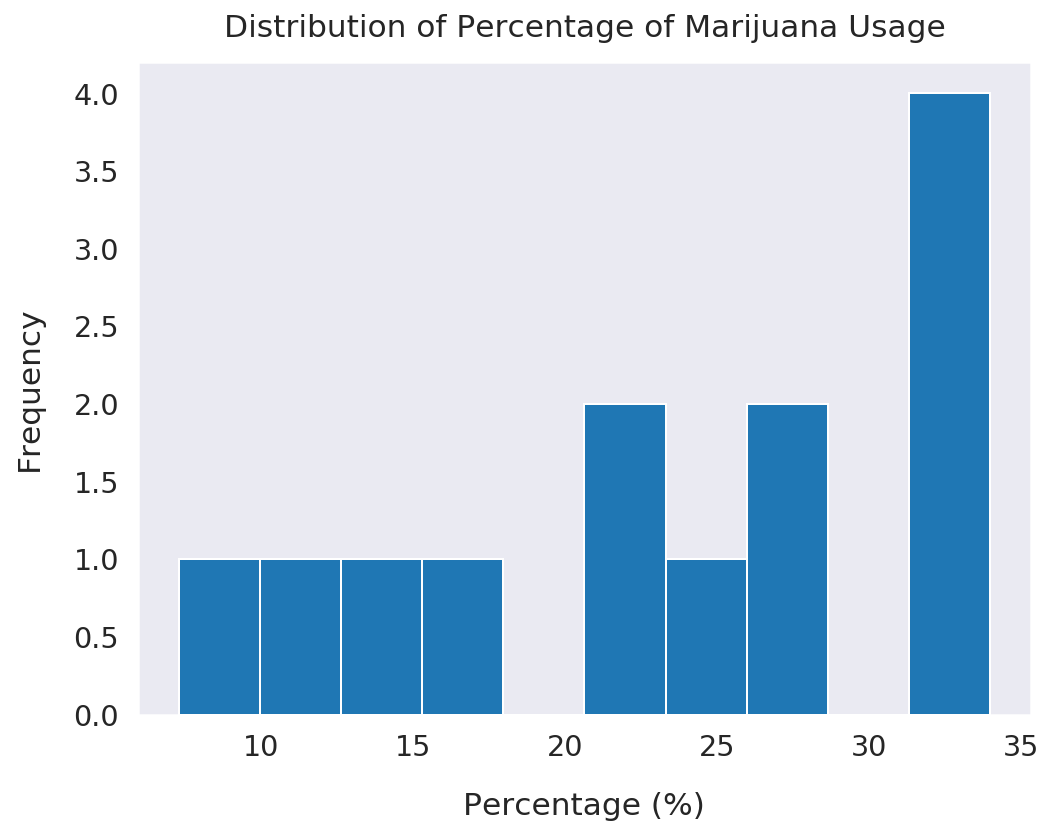

In [71]:
# Plot distribution for marijuana usage.
drug['marijuana-use'].plot(kind='hist', figsize=(8,6))
plt.xlabel('Percentage (%)', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title('Distribution of Percentage of Marijuana Usage', y=1.02)
plt.show()

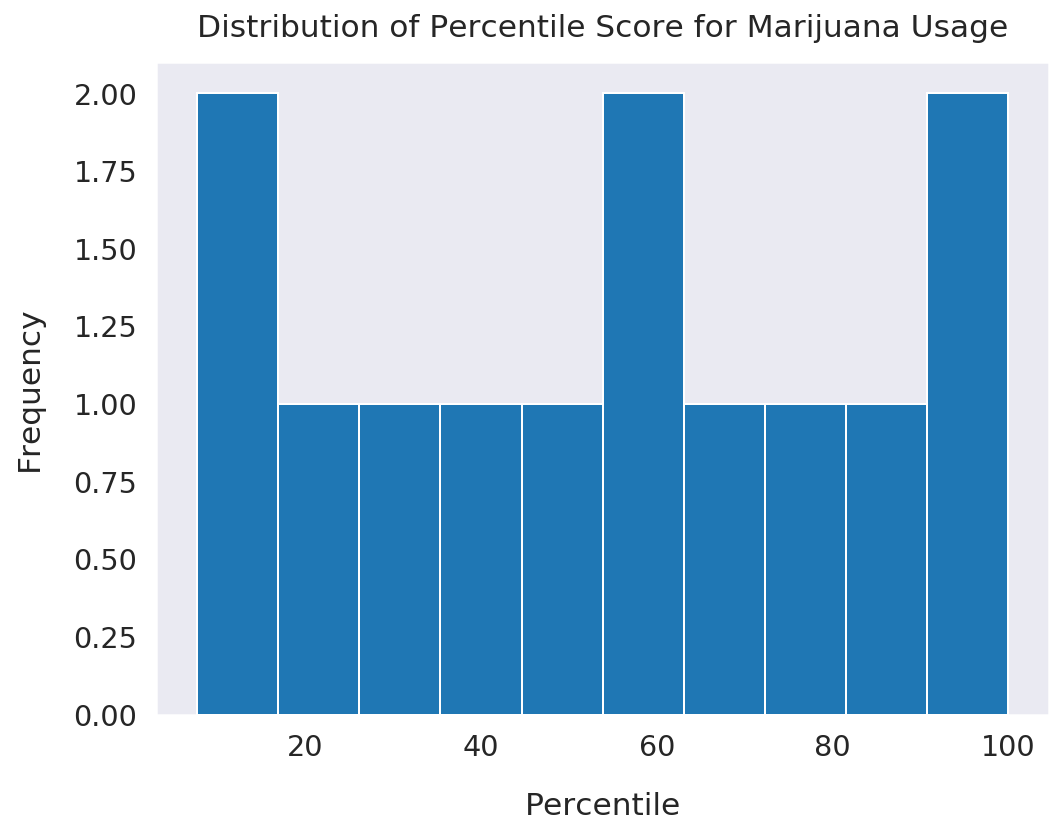

In [72]:
# Create new column for percentile score.
drug['marijuana-use-p'] = drug['marijuana-use'].\
    apply(lambda x: stats.percentileofscore(drug['marijuana-use'], x, kind='rank'))
# Plot the same variable with percentile score.
drug['marijuana-use-p'].plot(kind='hist', figsize=(8,6))
plt.xlabel('Percentile', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title('Distribution of Percentile Score for Marijuana Usage', y=1.02)
plt.show()